In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive

# Google Driveのマウント
drive.mount('/content/drive')

# CIデータの読み込み
data = '/content/drive/My Drive/研究/データ/統合データ.csv'
# encodingを'shift-jis'または'cp932'に変更して読み込み
data = pd.read_csv(data, parse_dates=['Date'], index_col='Date', encoding='shift-jis') # or encoding='cp932'

# データ確認
print(data.head())
print(data.info())

Mounted at /content/drive
            収益率(Nikkei225)  Log_Return  DI_leading    CI  CI_leading
Date                                                                
1985-01-01          0.0390    0.038259        54.5  91.8        85.2
1985-02-01          0.0274    0.027031        45.5  91.4        85.5
1985-03-01          0.0217    0.021468        40.9  91.3        85.4
1985-04-01         -0.0130   -0.013085        63.6  92.3        86.0
1985-05-01          0.0293    0.028879        54.5  92.3        86.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480 entries, 1985-01-01 to 2024-12-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   収益率(Nikkei225)  480 non-null    float64
 1   Log_Return      480 non-null    float64
 2   DI_leading      478 non-null    float64
 3   CI              478 non-null    float64
 4   CI_leading      478 non-null    float64
dtypes: float64(5)
memory usage: 22.5 KB
None


In [3]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 4.9 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
遷移行列:
 [[0.93594865 0.06405135]
 [0.08671662 0.91328338]]
状態ごとの平均:
 [[ 0.01621588]
 [-0.01609028]]
状態ごとの分散:
 [[[0.00173763]]

 [[0.00508377]]]
分類済みデータを /content/drive/My Drive/研究/データ/分類データ.csv に保存しました。


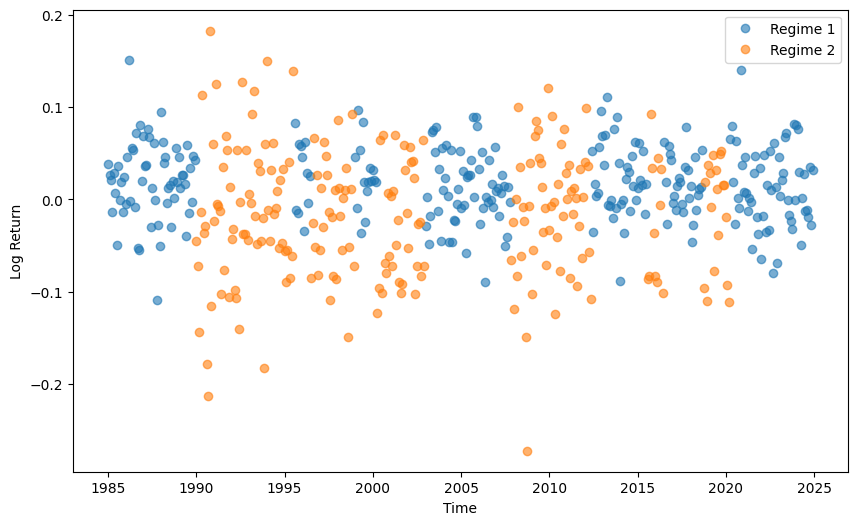

In [4]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
from google.colab import drive

# Google Driveのマウント
drive.mount('/content/drive')
# ファイル名
input_file =  '/content/drive/My Drive/研究/データ/統合データ.csv'  # データファイルのパスを指定
output_file =  '/content/drive/My Drive/研究/データ/分類データ.csv'  # 保存するファイル名を指定

# データを読み込む
data = pd.read_csv(input_file, parse_dates=['Date'], index_col='Date', encoding='shift-jis') # or encoding='cp932'

log_returns = data['Log_Return'].dropna()  # 対数収益率の列名に合わせてください

# HMMモデルの設定
n_states = 2  # 状態数を指定（例: 3つのレジーム）
model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000, random_state=42)

# モデルをフィッティング
model.fit(log_returns.values.reshape(-1, 1))

# 各時点のレジーム（状態）を推定
hidden_states = model.predict(log_returns.values.reshape(-1, 1))

# 推定されたパラメータを表示
print("遷移行列:\n", model.transmat_)
print("状態ごとの平均:\n", model.means_)
print("状態ごとの分散:\n", model.covars_)

# 元のデータにレジーム分類を追加
data['Regime'] = np.nan  # 初期化
data.loc[log_returns.index, 'Regime'] = hidden_states

# 新しいCSVファイルに保存
data.to_csv(output_file, index=False)
print(f"分類済みデータを {output_file} に保存しました。")

# 結果の可視化（任意）
plt.figure(figsize=(10, 6))
for i in range(n_states):
    plt.plot(data.loc[data['Regime'] == i, 'Log_Return'], label=f'Regime {i+1}', linestyle='none', marker='o', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.show()


In [5]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a5538e7db78ece836b981d00f8e949e9255a4eb2451ca3b08894473bdde8ec5c
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


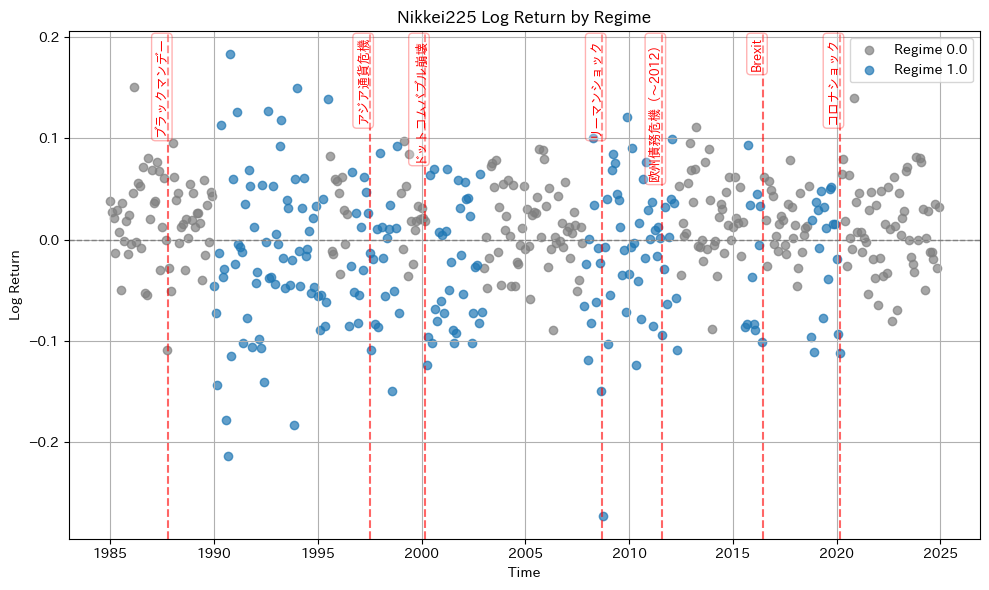

In [ ]:
# prompt: 上のデータにこれを反映したい
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime
# #--- サンプルとして、Nikkei225のリターンデータを含むDataFrameを想定 ---
# #   df は以下の列を持つと仮定：
# #     - 'Date': 日付（datetime型）
# #     - 'LogReturn': 対数リターン
# #     - 'Regime': モデルなどから判定したレジーム（1 or 2 等）
# # df = pd.read_csv('nikkei_return_data.csv', parse_dates=['Date'])
# #--- イベント一覧（必要に応じて追記/修正） ---
# events = [
#     (datetime(1987,10,19), 'ブラックマンデー'),
#     (datetime(1997,7,2), 'アジア通貨危機'),
#     (datetime(2000,3,10), 'ドットコムバブル崩壊'),
#     (datetime(2008,9,15), 'リーマンショック'),
#     (datetime(2011,8,1), '欧州債務危機（～2012）'),  # ざっくりとした開始目安
#     (datetime(2016,6,24), 'Brexit'),
#     (datetime(2020,3,1), 'コロナショック'),
# ]
# #--- プロットの準備 ---
# fig, ax = plt.subplots(figsize=(10,6))
# # レジームごとに色を変えて散布図としてプロット
# colors = {1: 'tab:blue', 2: 'tab:orange'}
# for regime_value in df['Regime'].unique():
#     subset = df[df['Regime'] == regime_value]
#     ax.scatter(
#         subset['Date'],
#         subset['LogReturn'],
#         color=colors.get(regime_value, 'gray'),
#         alpha=0.7,
#         label=f'Regime {regime_value}'
#     )
# # y=0（基準ライン）
# ax.axhline(0, color='gray', linestyle='--', linewidth=1)
# #--- イベントのラインとテキストを追加 ---
# for date, label in events:
#     ax.axvline(date, color='red', linestyle='--', alpha=0.6)
#     # テキストを少し上にずらして表示（y=0.20は例）
#     ax.text(
#         date, 0.20, label,
#         rotation=90,
#         rotation_mode='anchor',
#         va='bottom',  # テキストが縦線の上に来るよう調整
#         ha='right',
#         color='red',
#         fontsize=9,
#         bbox=dict(boxstyle='round', fc='white', ec='red', alpha=0.3)
#     )
# #--- 軸や凡例などの体裁設定 ---
# ax.set_title('Nikkei225 Log Return by Regime')
# ax.set_xlabel('Time')
# ax.set_ylabel('Log Return')
# ax.grid(True)
# ax.legend()
# # x軸の日付フォーマットを見やすく調整（任意）
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_major_locator(mdates.YearLocator(5))  # 5年ごとに主目盛を打つ例
# plt.tight_layout()
# plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
from hmmlearn.hmm import GaussianHMM
from datetime import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

# Google Driveのマウント
drive.mount('/content/drive')

# ファイル名
input_file =  '/content/drive/My Drive/研究/データ/統合データ.csv'  # データファイルのパスを指定
# データを読み込む
data = pd.read_csv(input_file, parse_dates=['Date'], index_col='Date', encoding='shift-jis') # or encoding='cp932'

log_returns = data['Log_Return'].dropna()  # 対数収益率の列名に合わせてください

# HMMモデルの設定
n_states = 2  # 状態数を指定（例: 3つのレジーム）
model = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000, random_state=42)

# モデルをフィッティング
model.fit(log_returns.values.reshape(-1, 1))

# 各時点のレジーム（状態）を推定
hidden_states = model.predict(log_returns.values.reshape(-1, 1))

# 元のデータにレジーム分類を追加
data['Regime'] = np.nan  # 初期化
data.loc[log_returns.index, 'Regime'] = hidden_states


#--- イベント一覧（必要に応じて追記/修正） ---
events = [
    (datetime(1987,10,19), 'ブラックマンデー'),
    (datetime(1997,7,2), 'アジア通貨危機'),
    (datetime(2000,3,10), 'ドットコムバブル崩壊'),
    (datetime(2008,9,15), 'リーマンショック'),
    (datetime(2011,8,1), '欧州債務危機（～2012）'),  # ざっくりとした開始目安
    (datetime(2016,6,24), 'Brexit'),
    (datetime(2020,3,1), 'コロナショック'),
]

#--- プロットの準備 ---
fig, ax = plt.subplots(figsize=(10,6))
# レジームごとに色を変えて散布図としてプロット
colors = {1: 'tab:blue', 2: 'tab:orange'}
for regime_value in data['Regime'].unique():
    subset = data[data['Regime'] == regime_value]
    ax.scatter(
        subset.index, #日付をindexから取得
        subset['Log_Return'],
        color=colors.get(regime_value, 'gray'),
        alpha=0.7,
        label=f'Regime {regime_value}'
    )
# y=0（基準ライン）
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

#--- イベントのラインとテキストを追加 ---
for date, label in events:
    ax.axvline(date, color='red', linestyle='--', alpha=0.6)
    # テキストを少し上にずらして表示（y=0.20は例）
    ax.text(
        date, 0.20, label,
        rotation=90,
        rotation_mode='anchor',
        va='bottom',  # テキストが縦線の上に来るよう調整
        ha='right',
        color='red',
        fontsize=9,
        bbox=dict(boxstyle='round', fc='white', ec='red', alpha=0.3)
    )

#--- 軸や凡例などの体裁設定 ---
ax.set_title('Nikkei225 Log Return by Regime')
ax.set_xlabel('Time')
ax.set_ylabel('Log Return')
ax.grid(True)
ax.legend()
# x軸の日付フォーマットを見やすく調整（任意）
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # 5年ごとに主目盛を打つ例
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

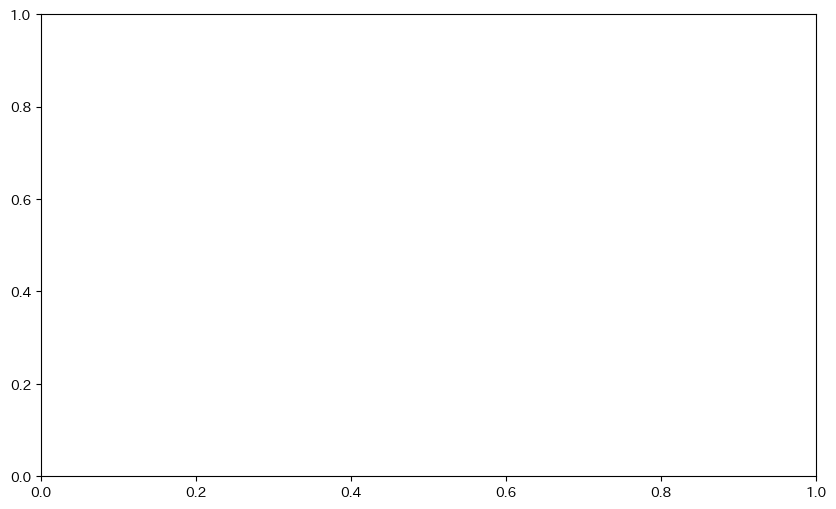

In [ ]:
# prompt: import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from datetime import datetime
# events = [
#     (datetime(1987,10,19), 'ブラックマンデー'),
#     (datetime(1989,12,29), 'バブル崩壊（～1990頃）'),
#     (datetime(1997,7,2),   'アジア通貨危機'),
#     (datetime(2000,3,10),  'ドットコムバブル崩壊'),
#     (datetime(2008,9,15),  'リーマンショック'),
#     (datetime(2010,5,1),   '欧州債務危機（～2012）'),
#     (datetime(2012,12,26), 'アベノミクス始動'),
#     (datetime(2016,6,24),  'Brexit'),
#     (datetime(2020,3,1),   'コロナショック'),
# ]
# # =========================================
# # 3) プロットの準備
# # =========================================
# fig, ax = plt.subplots(figsize=(10, 6))
# # レジームに応じて色を指定（例：Regime 0→灰色, Regime 1→青）
# colors = {0.0: 'gray', 1.0: 'tab:blue'}
# # レジームごとに散布図として描画
# for regime_value in df['Regime'].unique():
#     subset = df[df['Regime'] == regime_value]
#     ax.scatter(
#         subset['Date'],
#         subset['LogReturn'],
#         color=colors.get(regime_value, 'black'),  # デフォルトは黒
#         alpha=0.7,
#         label=f'Regime {regime_value}'
#     )
# # =========================================
# # 4) y=0のライン・イベント線・注釈の追加
# # =========================================
# ax.axhline(0, color='gray', linestyle='--', linewidth=1)  # 基準線
# # イベントごとに縦線とテキストを追加
# for date, label in events:
#     ax.axvline(date, color='red', linestyle='--', alpha=0.7)
#     ax.text(
#         date, 0.20, label,  # 注釈を y=0.20 くらいの高さに
#         rotation=90,
#         rotation_mode='anchor',
#         va='bottom',  # テキストが線の上部にくるようにする
#         ha='left',
#         color='red',
#         fontsize=9,
#         bbox=dict(boxstyle='round', fc='white', ec='red', alpha=0.3)
#     )
# # =========================================
# # 5) 軸や凡例の体裁設定
# # =========================================
# ax.set_title('Nikkei225 Log Return by Regime')
# ax.set_xlabel('Time')
# ax.set_ylabel('Log Return')
# ax.legend()
# ax.grid(True)
# # X軸の日付フォーマットを調整（任意）
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# ax.xaxis.set_major_locator(mdates.YearLocator(5))  # 5年ごとに目盛
# plt.tight_layout()
# で上のデータに

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame with 'Date', 'LogReturn', and 'Regime' columns.
# And that the necessary libraries (pandas, matplotlib, etc.) are already imported.

# ... (Your existing code for data loading and HMM analysis) ...

#--- イベント一覧（必要に応じて追記/修正） ---
events = [
    (datetime(1987,10,19), 'ブラックマンデー'),
    (datetime(1989,12,29), 'バブル崩壊（～1990頃）'),
    (datetime(1997,7,2),   'アジア通貨危機'),
    (datetime(2000,3,10),  'ドットコムバブル崩壊'),
    (datetime(2008,9,15),  'リーマンショック'),
    (datetime(2010,5,1),   '欧州債務危機（～2012）'),
    (datetime(2012,12,26), 'アベノミクス始動'),
    (datetime(2016,6,24),  'Brexit'),
    (datetime(2020,3,1),   'コロナショック'),
]

#--- プロットの準備 ---
fig, ax = plt.subplots(figsize=(10,6))

# レジームごとに色を変えて散布図としてプロット
colors = {0.0: 'gray', 1.0: 'tab:blue'} # Ensure colors match your regime values
for regime_value in df['Regime'].unique():
    subset = df[df['Regime'] == regime_value]
    ax.scatter(
        subset['Date'],
        subset['LogReturn'],
        color=colors.get(regime_value, 'black'),  # Default color if regime not in 'colors'
        alpha=0.7,
        label=f'Regime {regime_value}'
    )

# y=0（基準ライン）
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

#--- イベントのラインとテキストを追加 ---
for date, label in events:
    ax.axvline(date, color='red', linestyle='--', alpha=0.6)
    # テキストを少し上にずらして表示（y=0.20は例）
    ax.text(
        date, 0.20, label,  # Adjust the vertical position (0.20) if needed
        rotation=90,
        rotation_mode='anchor',
        va='bottom',
        ha='right',
        color='red',
        fontsize=9,
        bbox=dict(boxstyle='round', fc='white', ec='red', alpha=0.3)
    )


#--- 軸や凡例などの体裁設定 ---
ax.set_title('Nikkei225 Log Return by Regime')
ax.set_xlabel('Time')
ax.set_ylabel('Log Return')
ax.grid(True)
ax.legend()

# x軸の日付フォーマットを見やすく調整（任意）
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # 5年ごとに主目盛を打つ例

plt.tight_layout()
plt.show()


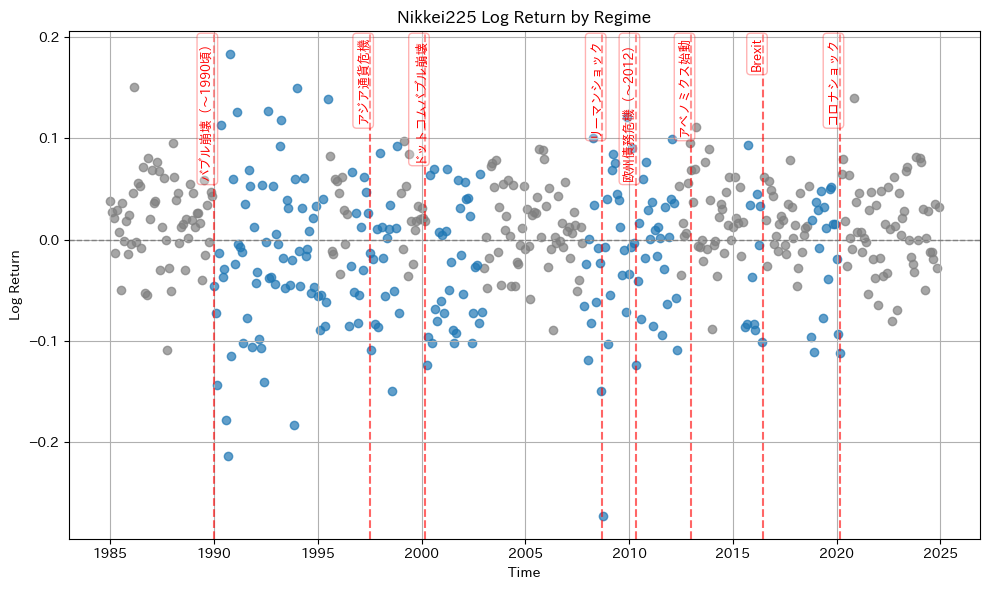

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame with 'Date', 'LogReturn', and 'Regime' columns.
# And that the necessary libraries (pandas, matplotlib, etc.) are already imported.

# ... (Your existing code for data loading and HMM analysis) ...

#--- イベント一覧（必要に応じて追記/修正） ---
events = [
    (datetime(1989,12,29), 'バブル崩壊（～1990頃）'),
    (datetime(1997,7,2),   'アジア通貨危機'),
    (datetime(2000,3,10),  'ドットコムバブル崩壊'),
    (datetime(2008,9,15),  'リーマンショック'),
    (datetime(2010,5,1),   '欧州債務危機（～2012）'),
    (datetime(2012,12,26), 'アベノミクス始動'),
    (datetime(2016,6,24),  'Brexit'),
    (datetime(2020,3,1),   'コロナショック'),
]

#--- プロットの準備 ---
fig, ax = plt.subplots(figsize=(10,6))

# レジームごとに色を変えて散布図としてプロット
colors = {0.0: 'gray', 1.0: 'tab:blue'} # Ensure colors match your regime values
# Replace 'df' with 'data' in the following lines:
for regime_value in data['Regime'].unique():
    subset = data[data['Regime'] == regime_value]
    ax.scatter(
        subset.index, # Use .index for Date as it's the index
        subset['Log_Return'],
        color=colors.get(regime_value, 'black'),  # Default color if regime not in 'colors'
        alpha=0.7,
        label=f'Regime {regime_value}'
    )

# y=0（基準ライン）
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

#--- イベントのラインとテキストを追加 ---
for date, label in events:
    ax.axvline(date, color='red', linestyle='--', alpha=0.6)
    # テキストを少し上にずらして表示（y=0.20は例）
    ax.text(
        date, 0.20, label,  # Adjust the vertical position (0.20) if needed
        rotation=90,
        rotation_mode='anchor',
        va='bottom',
        ha='right',
        color='red',
        fontsize=9,
        bbox=dict(boxstyle='round', fc='white', ec='red', alpha=0.3)
    )


#--- 軸や凡例などの体裁設定 ---
ax.set_title('Nikkei225 Log Return by Regime')
ax.set_xlabel('Time')
ax.set_ylabel('Log Return')
ax.grid(True)


# x軸の日付フォーマットを見やすく調整（任意）
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # 5年ごとに主目盛を打つ例

plt.tight_layout()
plt.show()

In [ ]:
# prompt: 上で得られた分散から標準偏差を出したい

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
from hmmlearn.hmm import GaussianHMM

# ... (previous code)

# 推定されたパラメータを表示
print("遷移行列:\n", model.transmat_)
print("状態ごとの平均:\n", model.means_)
print("状態ごとの分散:\n", model.covars_)

# 標準偏差を計算
std_devs = np.sqrt(model.covars_)

print("状態ごとの標準偏差:\n", std_devs)

# ... (rest of the code)

遷移行列:
 [[0.93594865 0.06405135]
 [0.08671662 0.91328338]]
状態ごとの平均:
 [[ 0.01621588]
 [-0.01609028]]
状態ごとの分散:
 [[[0.00173763]]

 [[0.00508377]]]
状態ごとの標準偏差:
 [[[0.04168489]]

 [[0.07130056]]]


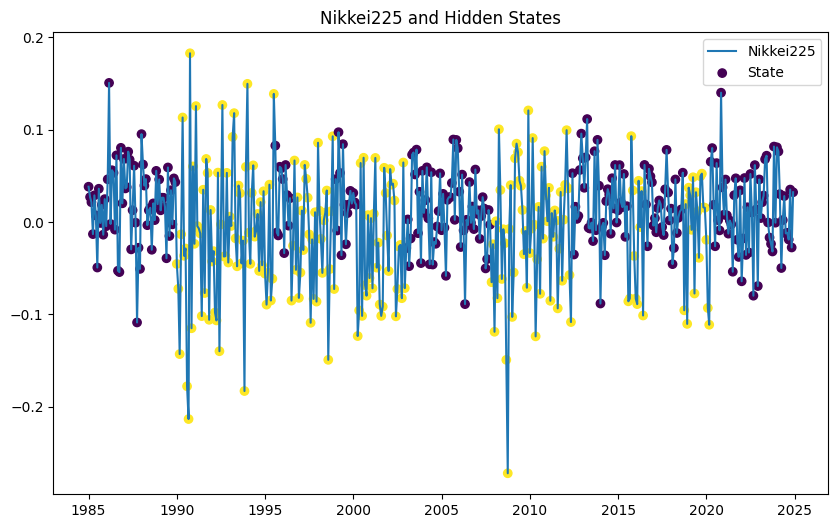

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Use data.index instead of data['Date'] to access the dates
plt.plot(data.index, data['Log_Return'], label='Nikkei225')
plt.scatter(data.index, data['Log_Return'], c=hidden_states, cmap='viridis', label='State')
plt.legend()
plt.title('Nikkei225 and Hidden States')
plt.show()

In [8]:
import pandas as pd
import numpy as np

data_path = '/content/drive/My Drive/研究/データ/統合データ.csv'

# pandasを使ってCSVファイルを読み込む
data = pd.read_csv(data_path, encoding='shift_jis')

# 月次の対数収益率 (Log_Return) を取得
log_returns = data['Log_Return'].dropna()

# ブラック-ショールズモデルのパラメータ推定
mu_monthly = log_returns.mean()  # 月次の平均リターン
sigma_monthly = log_returns.std()  # 月次の標準偏差

# 年率換算
mu_annual = mu_monthly * 12  # 年率換算
sigma_annual = sigma_monthly * np.sqrt(12)  # 年率ボラティリティ

# 結果の出力
print(f"月次の推定されたドリフト (平均リターン): {mu_monthly:.4f}")
print(f"月次の推定されたボラティリティ (標準偏差): {sigma_monthly:.4f}")
print(f"年率換算されたドリフト: {mu_annual:.4f}")
print(f"年率換算されたボラティリティ: {sigma_annual:.4f}")
print("mu_monthly=",mu_monthly)
print("sigma_monthly=",sigma_monthly)


月次の推定されたドリフト (平均リターン): 0.0026
月次の推定されたボラティリティ (標準偏差): 0.0581
年率換算されたドリフト: 0.0307
年率換算されたボラティリティ: 0.2012
mu_monthly= 0.0025611487125
sigma_monthly= 0.05806866811541934


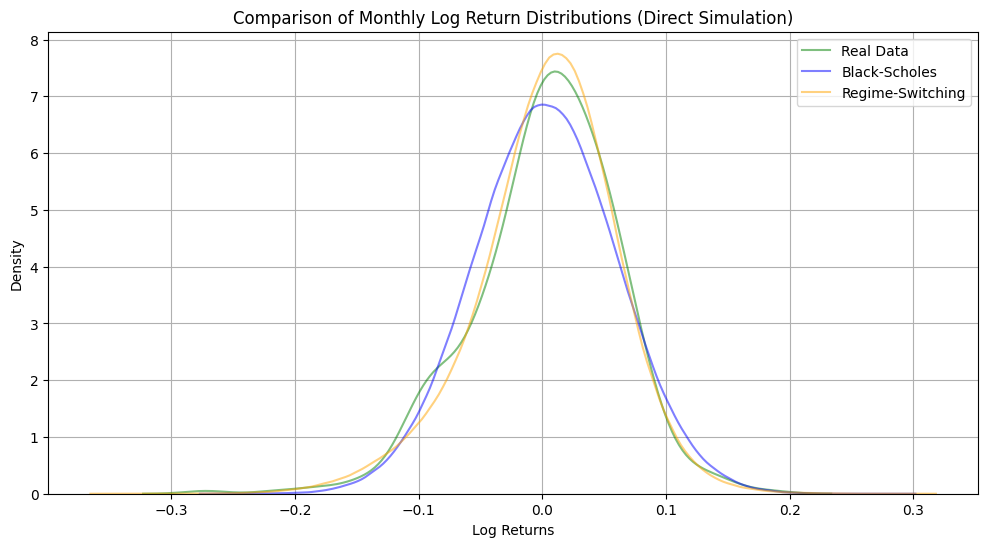

統計量（実データ）:
  平均: 0.00256, 標準偏差: 0.05801, 歪度: -0.55332, 尖度: 1.30017

統計量（ブラック-ショールズモデル）:
  平均: 0.00261, 標準偏差: 0.05802, 歪度: -0.00065, 尖度: -0.00184

統計量（レジームスイッチングモデル）:
  平均: 0.00331, 標準偏差: 0.05765, 歪度: -0.41195, 尖度: 0.80347


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 実データの月次対数収益率を取得
real_log_returns = data['Log_Return'].dropna()

# ブラック-ショールズモデルの収益率を直接生成
def simulate_bs_returns(mu, sigma, dt, n_steps, n_simulations):
    mean = mu
    std = sigma
    returns = np.random.normal(loc=mean, scale=std, size=(n_simulations, n_steps))
    return returns.flatten()

# レジームスイッチングモデルの収益率を直接生成
def simulate_rs_returns(trans_matrix, regime_means, regime_vols, dt, n_steps, n_simulations):
    returns = []
    for _ in range(n_simulations):
        current_state = 0
        for _ in range(n_steps):
            mean = regime_means[current_state]
            std = regime_vols[current_state]
            returns.append(np.random.normal(loc=mean, scale=std))
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return np.array(returns)

# パラメータ設定
T = 10  # 期間（年）
dt = 1 / 12  # 月次ステップ
n_steps = int(T / dt)  # ステップ数
n_simulations = 10000  # シミュレーション回数


# レジームスイッチングモデルのパラメータ
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# シミュレーション
bs_log_returns = simulate_bs_returns(mu_monthly, sigma_monthly, dt, n_steps, n_simulations)
rs_log_returns = simulate_rs_returns(trans_matrix, regime_means, regime_vols, dt, n_steps, n_simulations)

# 分布の比較
plt.figure(figsize=(12, 6))
sns.kdeplot(real_log_returns, label="Real Data", fill=False, color="green", alpha=0.5)
sns.kdeplot(bs_log_returns, label="Black-Scholes", fill=False, color="blue", alpha=0.5)
sns.kdeplot(rs_log_returns, label="Regime-Switching", fill=False, color="orange", alpha=0.5)
plt.title("Comparison of Monthly Log Return Distributions (Direct Simulation)")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# 統計量の比較
def calculate_tail_stats(data):
    mean = np.mean(data)
    std = np.std(data)
    skewness = pd.Series(data).skew()
    kurtosis = pd.Series(data).kurt()
    return mean, std, skewness, kurtosis

real_stats = calculate_tail_stats(real_log_returns)
bs_stats = calculate_tail_stats(bs_log_returns)
rs_stats = calculate_tail_stats(rs_log_returns)

print("統計量（実データ）:")
print(f"  平均: {real_stats[0]:.5f}, 標準偏差: {real_stats[1]:.5f}, 歪度: {real_stats[2]:.5f}, 尖度: {real_stats[3]:.5f}")

print("\n統計量（ブラック-ショールズモデル）:")
print(f"  平均: {bs_stats[0]:.5f}, 標準偏差: {bs_stats[1]:.5f}, 歪度: {bs_stats[2]:.5f}, 尖度: {bs_stats[3]:.5f}")

print("\n統計量（レジームスイッチングモデル）:")
print(f"  平均: {rs_stats[0]:.5f}, 標準偏差: {rs_stats[1]:.5f}, 歪度: {rs_stats[2]:.5f}, 尖度: {rs_stats[3]:.5f}")


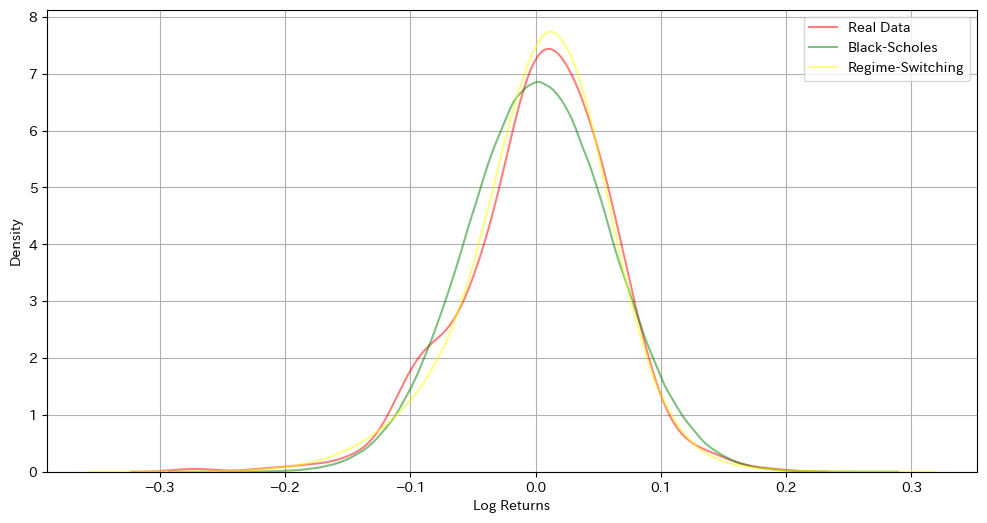

In [15]:
# prompt: 上のコードでブラックショールズモデルを緑にしてほしい　実データは赤　レジームは黄色 英語で

import matplotlib.pyplot as plt
# ... (previous code)

# シミュレーション
bs_log_returns = simulate_bs_returns(mu_monthly, sigma_monthly, dt, n_steps, n_simulations)
rs_log_returns = simulate_rs_returns(trans_matrix, regime_means, regime_vols, dt, n_steps, n_simulations)

# 分布の比較
plt.figure(figsize=(12, 6))
sns.kdeplot(real_log_returns, label="Real Data", fill=False, color="red", alpha=0.5) # Real data in red
sns.kdeplot(bs_log_returns, label="Black-Scholes", fill=False, color="green", alpha=0.5) # Black-Scholes in green
sns.kdeplot(rs_log_returns, label="Regime-Switching", fill=False, color="yellow", alpha=0.5) # Regime-Switching in yellow

plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


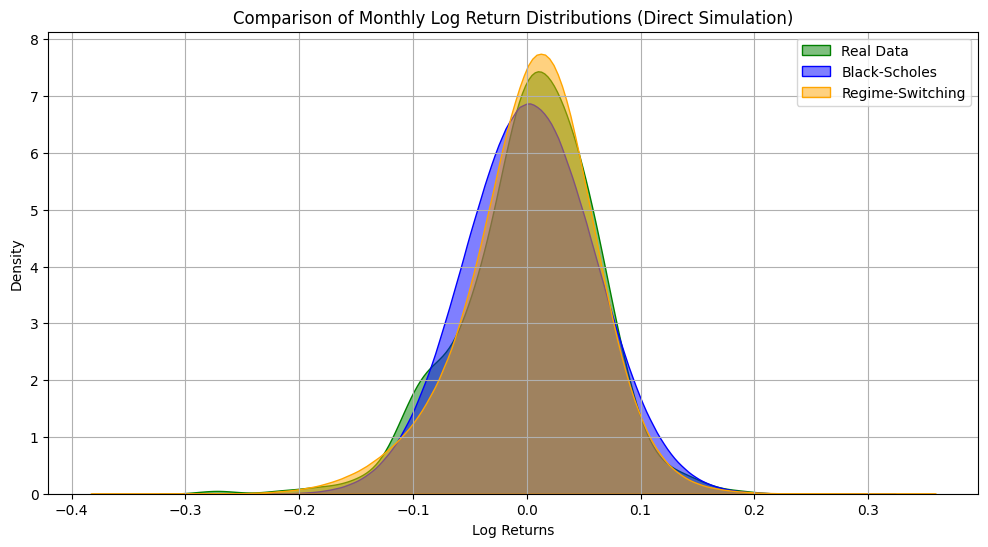

統計量（実データ）:
  平均: 0.00256, 標準偏差: 0.05801, 歪度: -0.55332, 尖度: 1.30017

統計量（ブラック-ショールズモデル）:
  平均: 0.00255, 標準偏差: 0.05808, 歪度: -0.00007, 尖度: -0.00242

統計量（レジームスイッチングモデル）:
  平均: 0.00322, 標準偏差: 0.05774, 歪度: -0.41318, 尖度: 0.80172


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 実データの月次対数収益率を取得
real_log_returns = data['Log_Return'].dropna()

# ブラック-ショールズモデルの収益率を直接生成
def simulate_bs_returns(mu, sigma, dt, n_steps, n_simulations):
    mean = mu
    std = sigma
    returns = np.random.normal(loc=mean, scale=std, size=(n_simulations, n_steps))
    return returns.flatten()

# レジームスイッチングモデルの収益率を直接生成
def simulate_rs_returns(trans_matrix, regime_means, regime_vols, dt, n_steps, n_simulations):
    returns = []
    for _ in range(n_simulations):
        current_state = 0
        for _ in range(n_steps):
            mean = regime_means[current_state]
            std = regime_vols[current_state]
            returns.append(np.random.normal(loc=mean, scale=std))
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return np.array(returns)

# パラメータ設定
T = 10  # 期間（年）
dt = 1 / 12  # 月次ステップ
n_steps = int(T / dt)  # ステップ数
n_simulations = 100000  # シミュレーション回数


# レジームスイッチングモデルのパラメータ
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# シミュレーション
bs_log_returns = simulate_bs_returns(mu_monthly, sigma_monthly, dt, n_steps, n_simulations)
rs_log_returns = simulate_rs_returns(trans_matrix, regime_means, regime_vols, dt, n_steps, n_simulations)

# 分布の比較
plt.figure(figsize=(12, 6))
sns.kdeplot(real_log_returns, label="Real Data", fill=True, color="green", alpha=0.5)
sns.kdeplot(bs_log_returns, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_log_returns, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.title("Comparison of Monthly Log Return Distributions (Direct Simulation)")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# 統計量の比較
def calculate_tail_stats(data):
    mean = np.mean(data)
    std = np.std(data)
    skewness = pd.Series(data).skew()
    kurtosis = pd.Series(data).kurt()
    return mean, std, skewness, kurtosis

real_stats = calculate_tail_stats(real_log_returns)
bs_stats = calculate_tail_stats(bs_log_returns)
rs_stats = calculate_tail_stats(rs_log_returns)

print("統計量（実データ）:")
print(f"  平均: {real_stats[0]:.5f}, 標準偏差: {real_stats[1]:.5f}, 歪度: {real_stats[2]:.5f}, 尖度: {real_stats[3]:.5f}")

print("\n統計量（ブラック-ショールズモデル）:")
print(f"  平均: {bs_stats[0]:.5f}, 標準偏差: {bs_stats[1]:.5f}, 歪度: {bs_stats[2]:.5f}, 尖度: {bs_stats[3]:.5f}")

print("\n統計量（レジームスイッチングモデル）:")
print(f"  平均: {rs_stats[0]:.5f}, 標準偏差: {rs_stats[1]:.5f}, 歪度: {rs_stats[2]:.5f}, 尖度: {rs_stats[3]:.5f}")


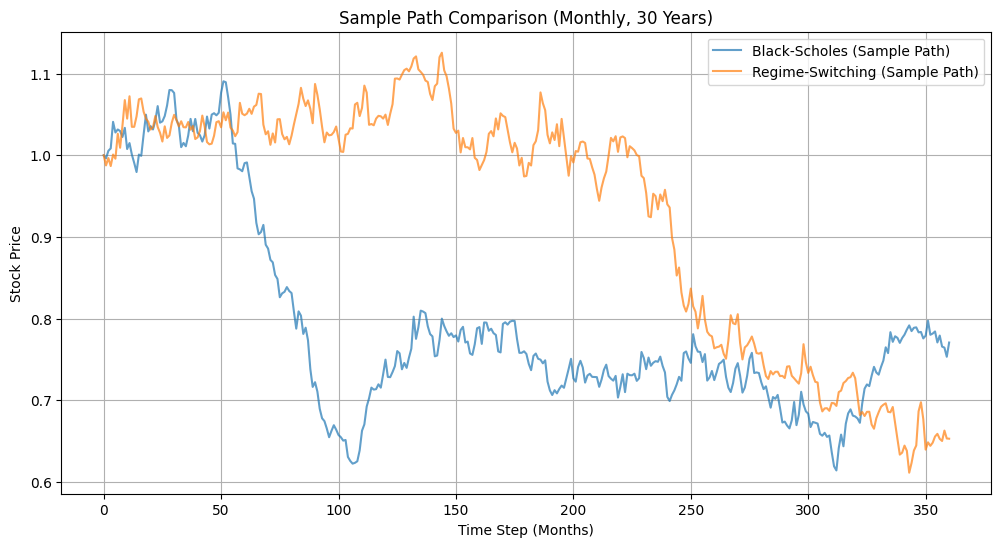

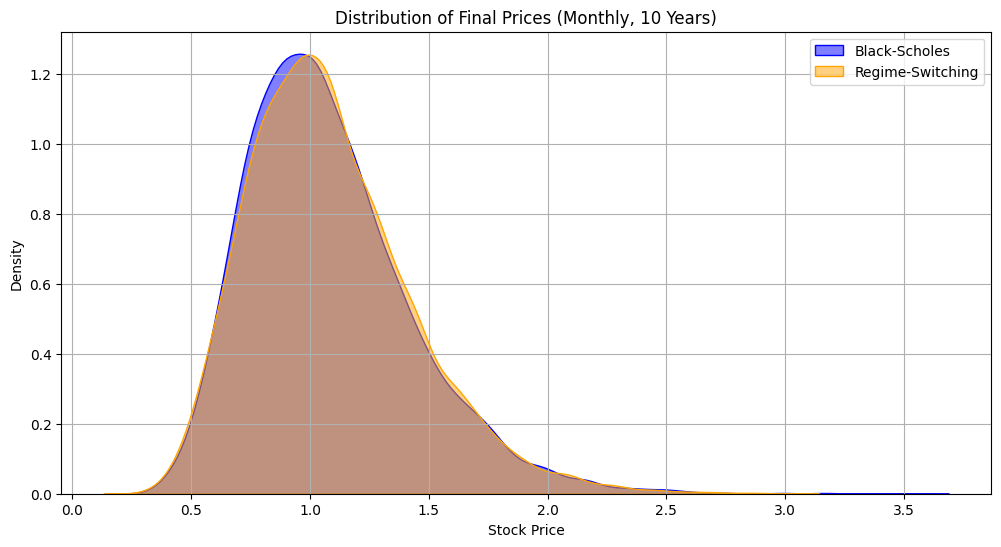

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）
epsilon_bs = 0  # 最低保証料率
S0 = 1  # 初期価格
T = 30  # 期間（年）
n_steps_per_year = 12  # 月次データ
n_steps = T * n_steps_per_year  # 総ステップ数
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 10000  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# シミュレーション実行
bs_paths = simulate_bs_model(S0, mu_monthly, sigma_monthly, epsilon_bs, n_steps, dt, n_simulations)
rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)

# 終値の分布を取得
bs_final_prices = bs_paths[:, -1]
rs_final_prices = rs_paths[:, -1]

# サンプルパスの比較（1本のプロット）
plt.figure(figsize=(12, 6))
plt.plot(bs_paths[0, :], label="Black-Scholes (Sample Path)", alpha=0.7)
plt.plot(rs_paths[0, :], label="Regime-Switching (Sample Path)", alpha=0.7)
plt.title("Sample Path Comparison (Monthly, 30 Years)")
plt.xlabel("Time Step (Months)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# 終値分布の比較（ヒストグラムと密度プロット）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_final_prices, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_final_prices, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.title("Distribution of Final Prices (Monthly, 10 Years)")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


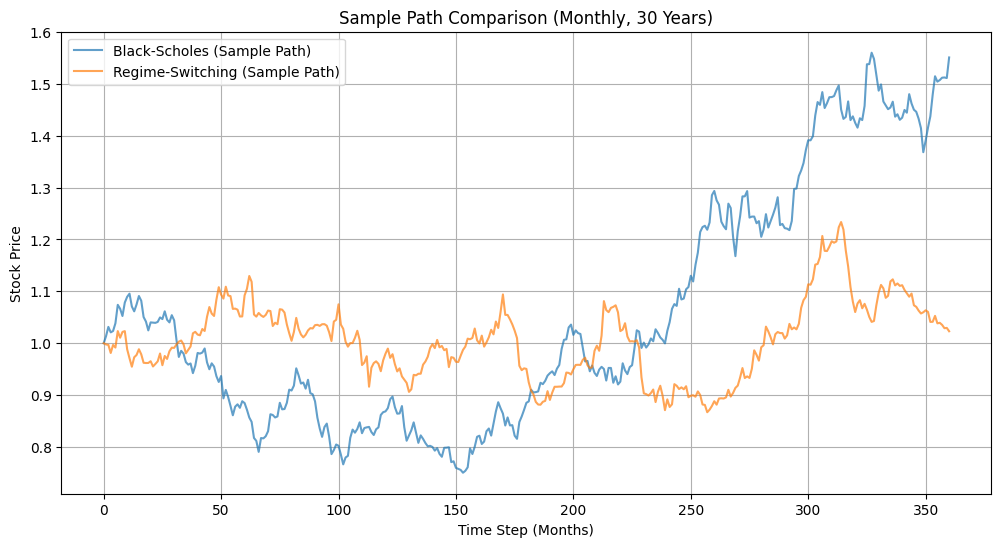

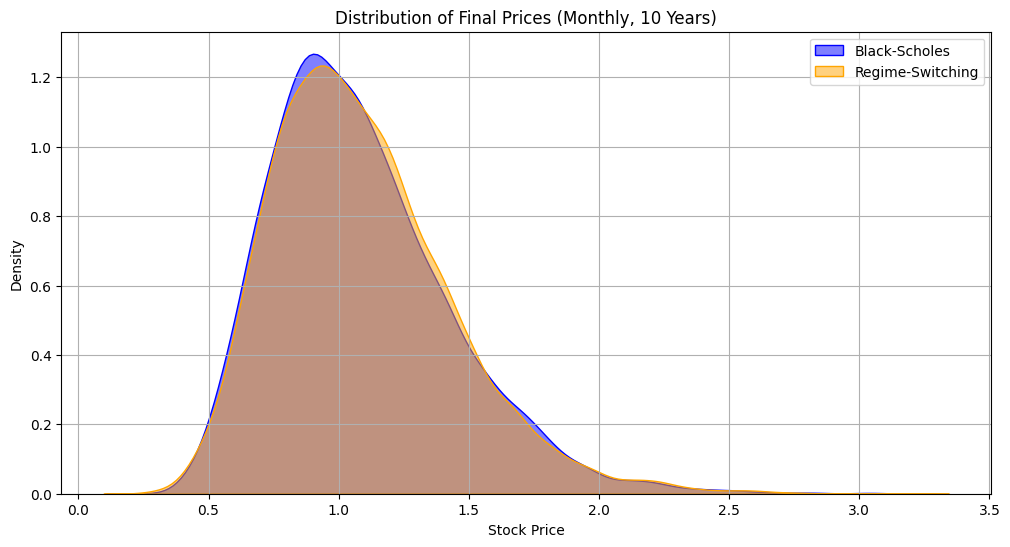

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）
epsilon_bs = 0  # 最低保証料率
S0 = 1  # 初期価格
T = 30  # 期間（年）
n_steps_per_year = 12  # 月次データ
n_steps = T * n_steps_per_year  # 総ステップ数
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 10000  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# シミュレーション実行
bs_paths = simulate_bs_model(S0, mu_monthly, sigma_monthly, epsilon_bs, n_steps, dt, n_simulations)
rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)

# 終値の分布を取得
bs_final_prices = bs_paths[:, -1]
rs_final_prices = rs_paths[:, -1]

# サンプルパスの比較（1本のプロット）
plt.figure(figsize=(12, 6))
plt.plot(bs_paths[0, :], label="Black-Scholes (Sample Path)", alpha=0.7)
plt.plot(rs_paths[0, :], label="Regime-Switching (Sample Path)", alpha=0.7)
plt.title("Sample Path Comparison (Monthly, 30 Years)")
plt.xlabel("Time Step (Months)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# 終値分布の比較（ヒストグラムと密度プロット）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_final_prices, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_final_prices, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.title("Distribution of Final Prices (Monthly, 10 Years)")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


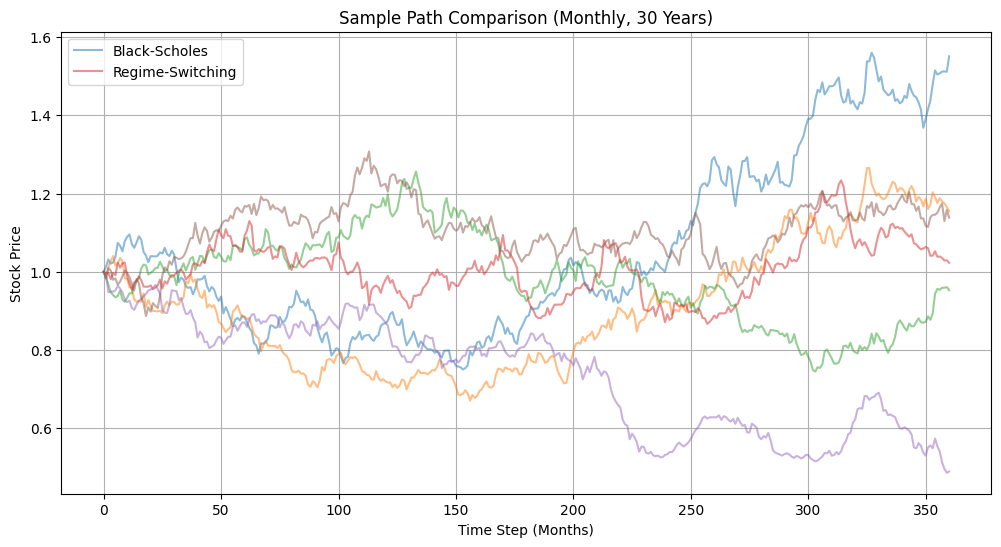

In [ ]:
# サンプルパスの比較（複数のプロット）
plt.figure(figsize=(12, 6))

# 表示するパスの数
num_paths_to_plot = 3

# Black-Scholesのパスをプロット
for i in range(num_paths_to_plot):
    plt.plot(bs_paths[i, :], label="Black-Scholes" if i == 0 else "", alpha=0.5)  # 最初のパスだけラベルを表示

# Regime-Switchingのパスをプロット
for i in range(num_paths_to_plot):
    plt.plot(rs_paths[i, :], label="Regime-Switching" if i == 0 else "", alpha=0.5)  # 最初のパスだけラベルを表示


plt.title("Sample Path Comparison (Monthly, 30 Years)")
plt.xlabel("Time Step (Months)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

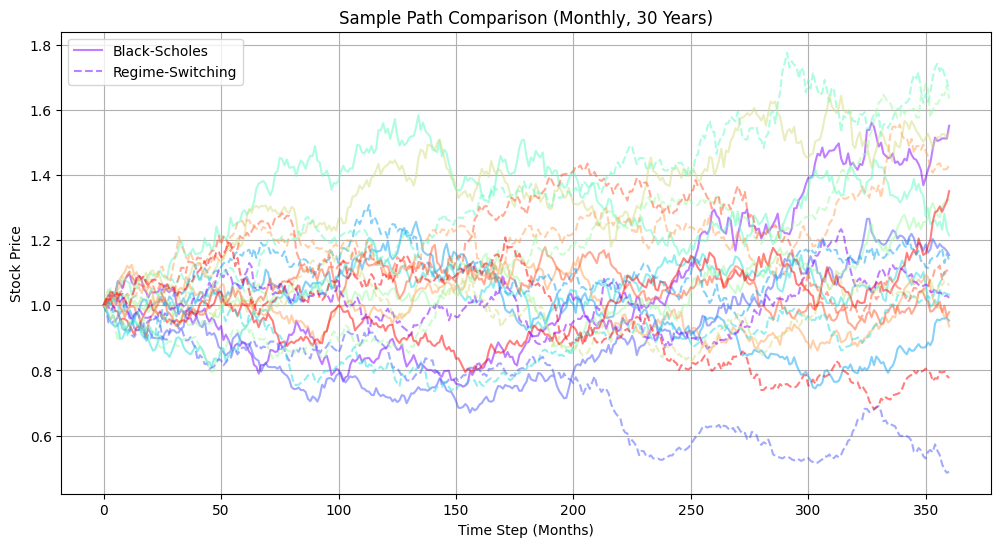

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm  # colormapモジュールをインポート

# ... (previous code) ...

# サンプルパスの比較（複数のプロット）
plt.figure(figsize=(12, 6))

# 表示するパスの数
num_paths_to_plot = 10

# colormapを使って色を生成
colors = cm.rainbow(np.linspace(0, 1, num_paths_to_plot))

# Black-Scholesのパスをプロット
for i in range(num_paths_to_plot):
    plt.plot(bs_paths[i, :], label="Black-Scholes" if i == 0 else "", alpha=0.5, color=colors[i])

# Regime-Switchingのパスをプロット
for i in range(num_paths_to_plot):
    plt.plot(rs_paths[i, :], label="Regime-Switching" if i == 0 else "", alpha=0.5, linestyle='--', color=colors[i])  # 破線と色を設定


plt.title("Sample Path Comparison (Monthly, 30 Years)")
plt.xlabel("Time Step (Months)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

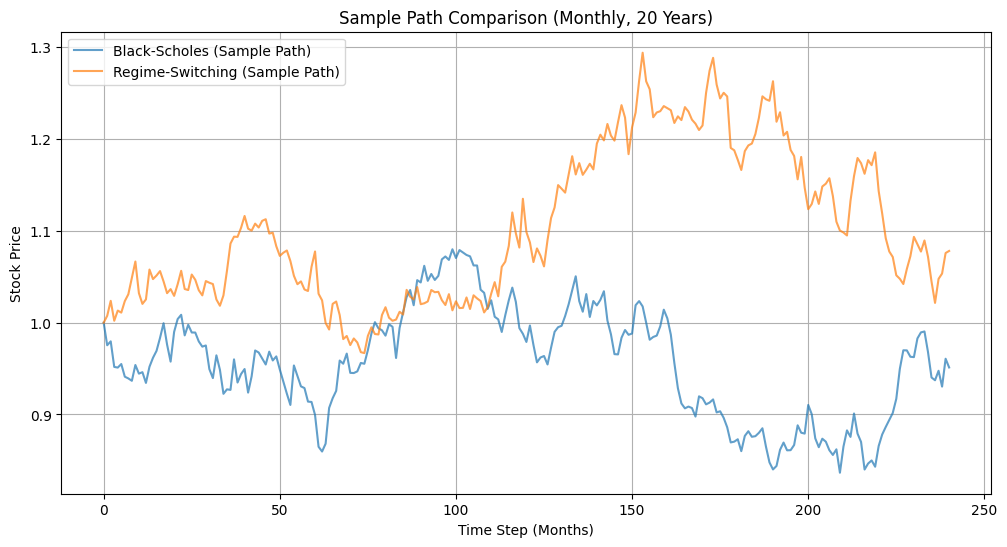

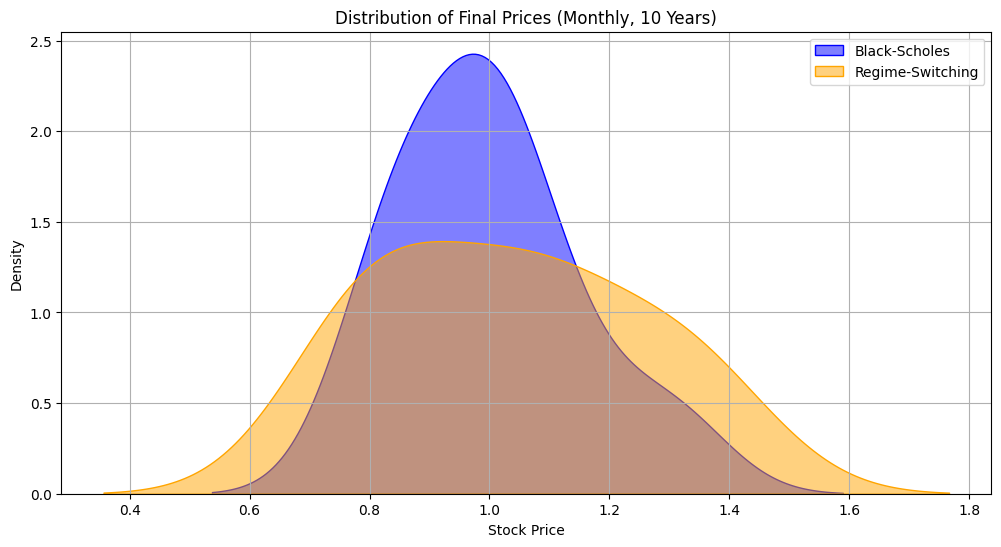

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）
epsilon_bs = 0  # 最低保証料率
S0 = 1  # 初期価格
T = 20  # 期間（年）
n_steps_per_year = 12  # 月次データ
n_steps = T * n_steps_per_year  # 総ステップ数
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 10  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# シミュレーション実行
bs_paths = simulate_bs_model(S0, mu_monthly, sigma_monthly, epsilon_bs, n_steps, dt, n_simulations)
rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)

# 終値の分布を取得
bs_final_prices = bs_paths[:, -1]
rs_final_prices = rs_paths[:, -1]

# サンプルパスの比較（1本のプロット）
plt.figure(figsize=(12, 6))
plt.plot(bs_paths[0, :], label="Black-Scholes (Sample Path)", alpha=0.7)
plt.plot(rs_paths[0, :], label="Regime-Switching (Sample Path)", alpha=0.7)
plt.title("Sample Path Comparison (Monthly, 20 Years)")
plt.xlabel("Time Step (Months)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# 終値分布の比較（ヒストグラムと密度プロット）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_final_prices, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_final_prices, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.title("Distribution of Final Prices (Monthly, 10 Years)")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


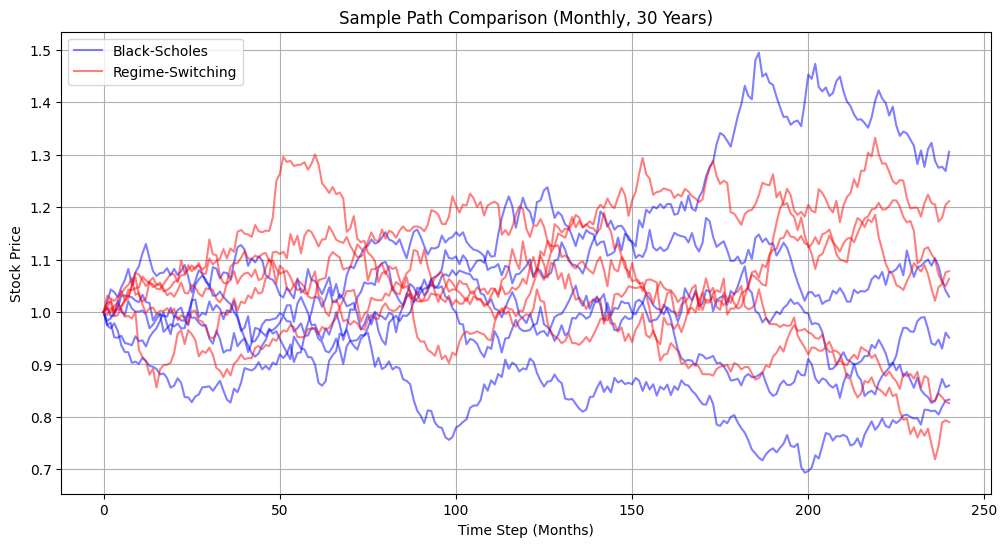

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (previous code) ...

# サンプルパスの比較（複数のプロット）
plt.figure(figsize=(12, 6))

# 表示するパスの数
num_paths_to_plot = 5

# Black-Scholesのパスをプロット (青の濃淡)
for i in range(num_paths_to_plot):
    plt.plot(bs_paths[i, :], label="Black-Scholes" if i == 0 else "", alpha=0.5, color='blue')

# Regime-Switchingのパスをプロット (オレンジの濃淡)
for i in range(num_paths_to_plot):
    plt.plot(rs_paths[i, :], label="Regime-Switching" if i == 0 else "", alpha=0.5, color='red')  # 破線と色を設定


plt.title("Sample Path Comparison (Monthly, 30 Years)")
plt.xlabel("Time Step (Months)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

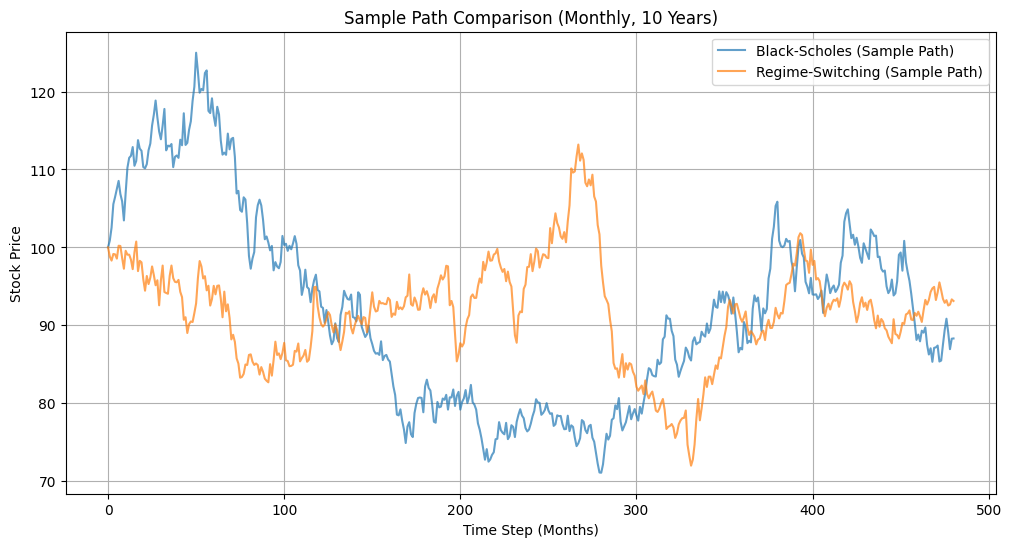

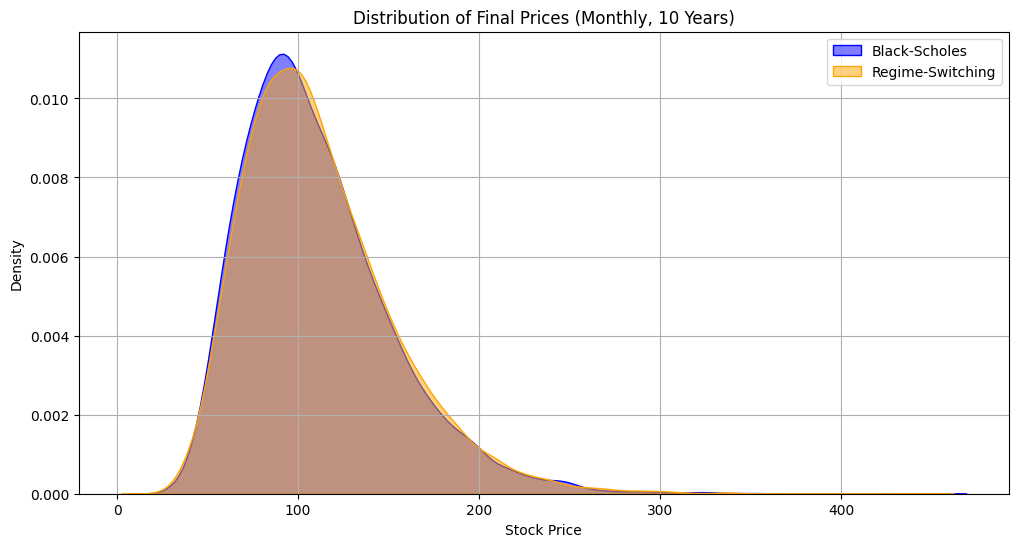

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）
epsilon_bs = 0  # 最低保証料率
S0 = 100  # 初期価格
T = 40  # 期間（年）
n_steps_per_year = 12  # 月次データ
n_steps = T * n_steps_per_year  # 総ステップ数
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 10000  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# シミュレーション実行
bs_paths = simulate_bs_model(S0, mu_monthly, sigma_monthly, epsilon_bs, n_steps, dt, n_simulations)
rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)

# 終値の分布を取得
bs_final_prices = bs_paths[:, -1]
rs_final_prices = rs_paths[:, -1]

# サンプルパスの比較（1本のプロット）
plt.figure(figsize=(12, 6))
plt.plot(bs_paths[0, :], label="Black-Scholes (Sample Path)", alpha=0.7)
plt.plot(rs_paths[0, :], label="Regime-Switching (Sample Path)", alpha=0.7)
plt.title("Sample Path Comparison (Monthly, 10 Years)")
plt.xlabel("Time Step (Months)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# 終値分布の比較（ヒストグラムと密度プロット）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_final_prices, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_final_prices, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.title("Distribution of Final Prices (Monthly, 10 Years)")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


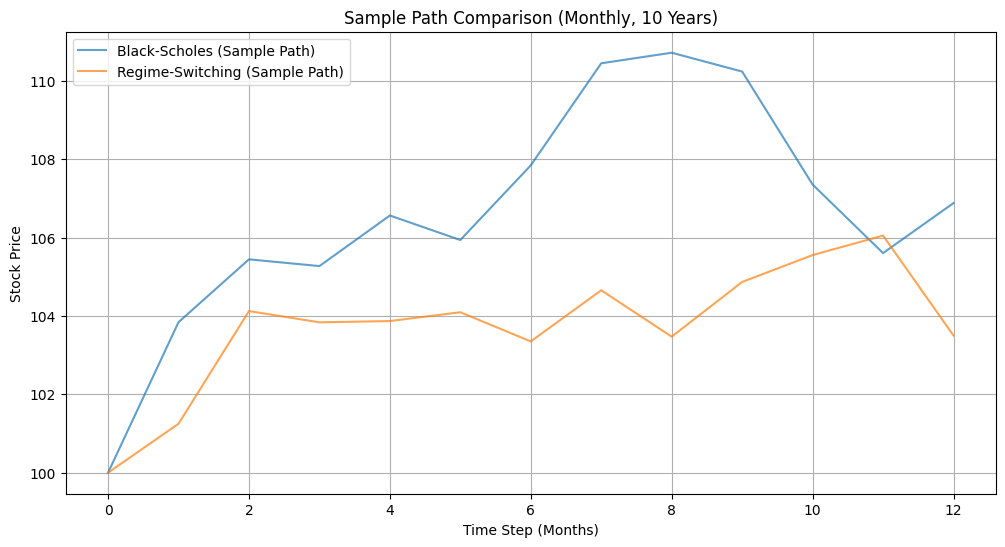

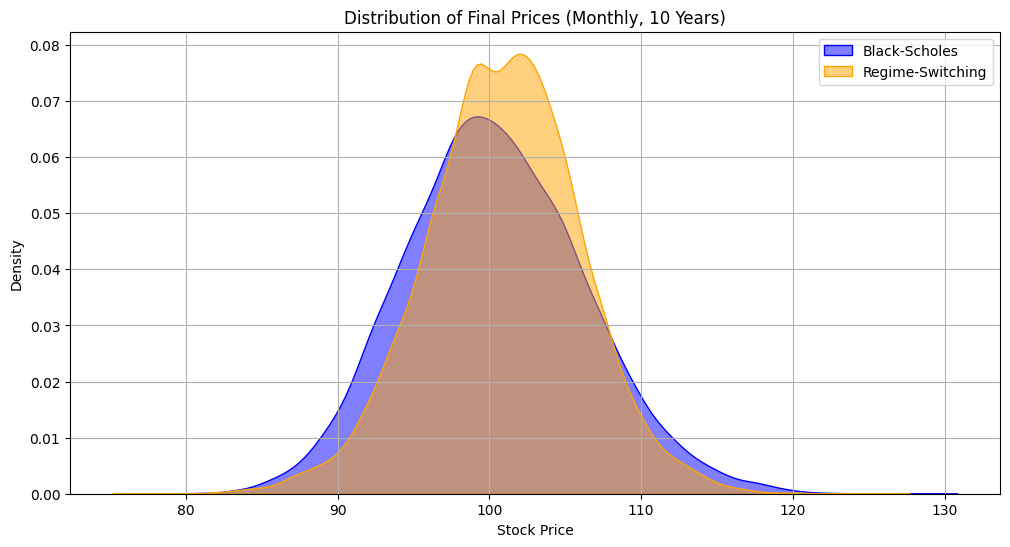

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）
epsilon_bs = 0  # 最低保証料率
S0 = 100  # 初期価格
T = 1  # 期間（年）
n_steps_per_year = 12  # 月次データ
n_steps = T * n_steps_per_year  # 総ステップ数
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 10000  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# シミュレーション実行
bs_paths = simulate_bs_model(S0, mu_monthly, sigma_monthly, epsilon_bs, n_steps, dt, n_simulations)
rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)

# 終値の分布を取得
bs_final_prices = bs_paths[:, -1]
rs_final_prices = rs_paths[:, -1]

# サンプルパスの比較（1本のプロット）
plt.figure(figsize=(12, 6))
plt.plot(bs_paths[0, :], label="Black-Scholes (Sample Path)", alpha=0.7)
plt.plot(rs_paths[0, :], label="Regime-Switching (Sample Path)", alpha=0.7)
plt.title("Sample Path Comparison (Monthly, 10 Years)")
plt.xlabel("Time Step (Months)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()

# 終値分布の比較（ヒストグラムと密度プロット）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_final_prices, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_final_prices, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.title("Distribution of Final Prices (Monthly, 10 Years)")
plt.xlabel("Stock Price")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


ブラック-ショールズモデルのVaR:
  信頼水準 95%: -0.56389
  信頼水準 99%: -0.80859

レジームスイッチングモデルのVaR:
  信頼水準 95%: -0.57654
  信頼水準 99%: -0.83975


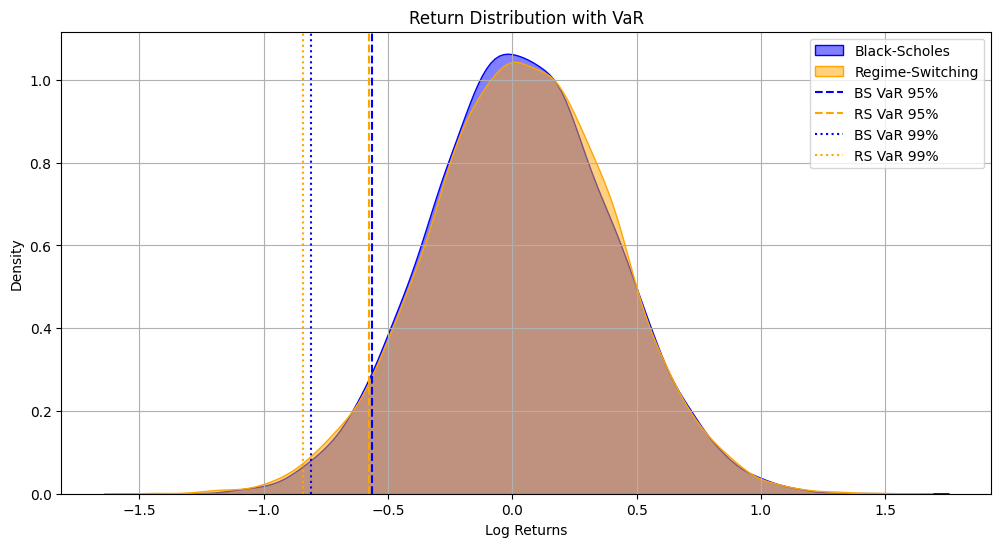

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）

epsilon_bs = 0  # 最低保証料率
S0 = 100  # 初期価格
T = 40  # 期間（年）
n_steps_per_year = 12  # 月次データ
n_steps = T * n_steps_per_year  # 総ステップ数
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 10000  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# シミュレーション実行
bs_paths = simulate_bs_model(S0, mu_monthly, sigma_monthly, epsilon_bs, n_steps, dt, n_simulations)
rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)

# 終値の分布を取得
bs_final_prices = bs_paths[:, -1]
rs_final_prices = rs_paths[:, -1]

# 終値からリターンを計算（対数リターン）
bs_returns = np.log(bs_final_prices / S0)
rs_returns = np.log(rs_final_prices / S0)

# VaRの計算（信頼水準 95% と 99%）
confidence_levels = [0.95, 0.99]
bs_var = {conf: np.percentile(bs_returns, 100 * (1 - conf)) for conf in confidence_levels}
rs_var = {conf: np.percentile(rs_returns, 100 * (1 - conf)) for conf in confidence_levels}

# VaRの結果を表示
print("ブラック-ショールズモデルのVaR:")
for conf, value in bs_var.items():
    print(f"  信頼水準 {int(conf * 100)}%: {value:.5f}")

print("\nレジームスイッチングモデルのVaR:")
for conf, value in rs_var.items():
    print(f"  信頼水準 {int(conf * 100)}%: {value:.5f}")

# 分布の可視化（リターン分布）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_returns, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_returns, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.axvline(bs_var[0.95], color='blue', linestyle='--', label="BS VaR 95%")
plt.axvline(rs_var[0.95], color='orange', linestyle='--', label="RS VaR 95%")
plt.axvline(bs_var[0.99], color='blue', linestyle=':', label="BS VaR 99%")
plt.axvline(rs_var[0.99], color='orange', linestyle=':', label="RS VaR 99%")
plt.title("Return Distribution with VaR")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


ステップが多いパターン

ブラック-ショールズモデルのVaR:
  信頼水準 95%: -0.56694
  信頼水準 99%: -0.81683

レジームスイッチングモデルのVaR:
  信頼水準 95%: -0.56890
  信頼水準 99%: -0.83997


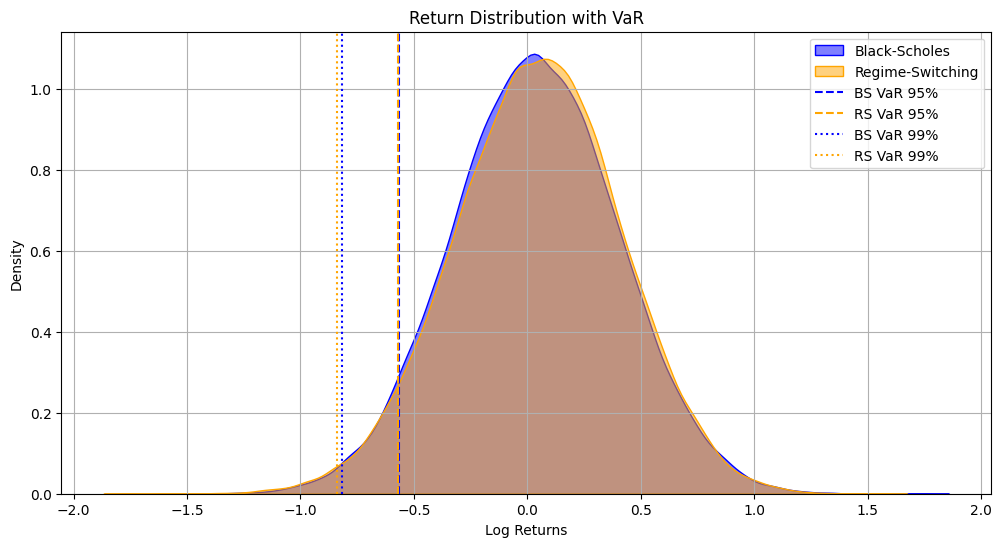

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）

epsilon_bs = 0  # 最低保証料率
S0 = 100  # 初期価格
T = 40  # 期間（年）
n_steps_per_year = 12  # 月次データ
n_steps = T * n_steps_per_year  # 総ステップ数
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 100000  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# シミュレーション実行
bs_paths = simulate_bs_model(S0, mu_monthly, sigma_monthly, epsilon_bs, n_steps, dt, n_simulations)
rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)

# 終値の分布を取得
bs_final_prices = bs_paths[:, -1]
rs_final_prices = rs_paths[:, -1]

# 終値からリターンを計算（対数リターン）
bs_returns = np.log(bs_final_prices / S0)
rs_returns = np.log(rs_final_prices / S0)

# VaRの計算（信頼水準 95% と 99%）
confidence_levels = [0.95, 0.99]
bs_var = {conf: np.percentile(bs_returns, 100 * (1 - conf)) for conf in confidence_levels}
rs_var = {conf: np.percentile(rs_returns, 100 * (1 - conf)) for conf in confidence_levels}

# VaRの結果を表示
print("ブラック-ショールズモデルのVaR:")
for conf, value in bs_var.items():
    print(f"  信頼水準 {int(conf * 100)}%: {value:.5f}")

print("\nレジームスイッチングモデルのVaR:")
for conf, value in rs_var.items():
    print(f"  信頼水準 {int(conf * 100)}%: {value:.5f}")

# 分布の可視化（リターン分布）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_returns, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_returns, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.axvline(bs_var[0.95], color='blue', linestyle='--', label="BS VaR 95%")
plt.axvline(rs_var[0.95], color='orange', linestyle='--', label="RS VaR 95%")
plt.axvline(bs_var[0.99], color='blue', linestyle=':', label="BS VaR 99%")
plt.axvline(rs_var[0.99], color='orange', linestyle=':', label="RS VaR 99%")
plt.title("Return Distribution with VaR")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


ブラック-ショールズモデルのVaR:
  信頼水準 95%: -0.29479
  信頼水準 97%: -0.35306
  信頼水準 99%: -0.42110
  信頼水準 99%: -0.46691

レジームスイッチングモデルのVaR:
  信頼水準 95%: -0.29058
  信頼水準 97%: -0.35252
  信頼水準 99%: -0.42567
  信頼水準 99%: -0.47529


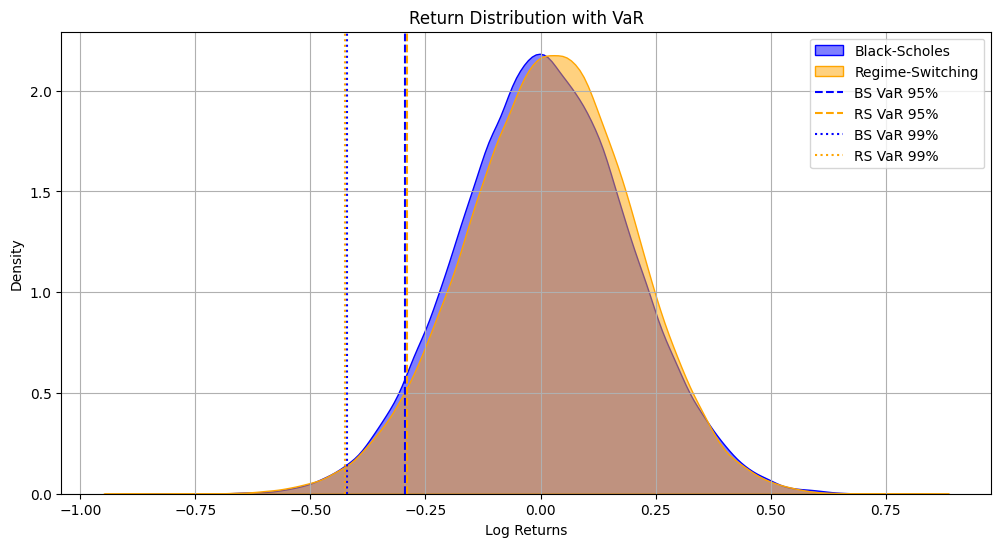

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）

epsilon_bs = 0  # 最低保証料率
S0 = 100  # 初期価格
T = 10  # 期間（年）
n_steps_per_year = 12  # 月次データ
n_steps = T * n_steps_per_year  # 総ステップ数
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 100000  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# シミュレーション実行
bs_paths = simulate_bs_model(S0, mu_monthly, sigma_monthly, epsilon_bs, n_steps, dt, n_simulations)
rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)

# 終値の分布を取得
bs_final_prices = bs_paths[:, -1]
rs_final_prices = rs_paths[:, -1]

# 終値からリターンを計算（対数リターン）
bs_returns = np.log(bs_final_prices / S0)
rs_returns = np.log(rs_final_prices / S0)

# VaRの計算（信頼水準 95% と 99%）
confidence_levels = [0.95, 0.975,0.99,0.995]
bs_var = {conf: np.percentile(bs_returns, 100 * (1 - conf)) for conf in confidence_levels}
rs_var = {conf: np.percentile(rs_returns, 100 * (1 - conf)) for conf in confidence_levels}

# VaRの結果を表示
print("ブラック-ショールズモデルのVaR:")
for conf, value in bs_var.items():
    print(f"  信頼水準 {int(conf * 100)}%: {value:.5f}")

print("\nレジームスイッチングモデルのVaR:")
for conf, value in rs_var.items():
    print(f"  信頼水準 {int(conf * 100)}%: {value:.5f}")

# 分布の可視化（リターン分布）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_returns, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_returns, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.axvline(bs_var[0.95], color='blue', linestyle='--', label="BS VaR 95%")
plt.axvline(rs_var[0.95], color='orange', linestyle='--', label="RS VaR 95%")
plt.axvline(bs_var[0.99], color='blue', linestyle=':', label="BS VaR 99%")
plt.axvline(rs_var[0.99], color='orange', linestyle=':', label="RS VaR 99%")
plt.title("Return Distribution with VaR")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


ブラック-ショールズモデルのVaRとES:
  信頼水準 95%: VaR = -0.29479, ES = -0.37196
  信頼水準 97%: VaR = -0.35306, ES = -0.42237
  信頼水準 99%: VaR = -0.42110, ES = -0.48272
  信頼水準 99%: VaR = -0.46691, ES = -0.52398

レジームスイッチングモデルのVaRとES:
  信頼水準 95%: VaR = -0.29058, ES = -0.37288
  信頼水準 97%: VaR = -0.35252, ES = -0.42725
  信頼水準 99%: VaR = -0.42567, ES = -0.49269
  信頼水準 99%: VaR = -0.47529, ES = -0.53776


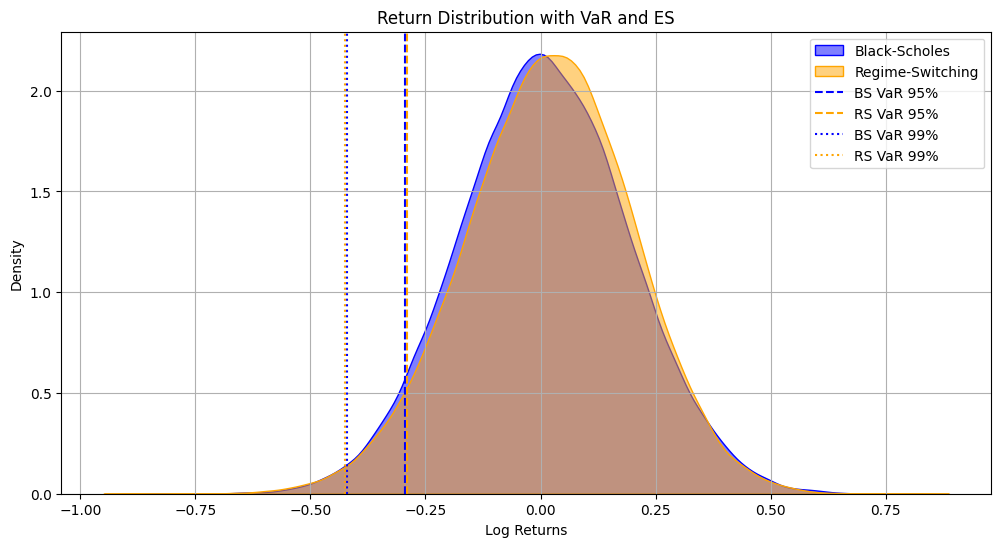

In [ ]:
# ESの計算（信頼水準 95% と 99%）
def calculate_es(returns, var, confidence_level):
    return returns[returns <= var].mean()

bs_es = {conf: calculate_es(bs_returns, bs_var[conf], conf) for conf in confidence_levels}
rs_es = {conf: calculate_es(rs_returns, rs_var[conf], conf) for conf in confidence_levels}

# VaRとESの結果を表示
print("ブラック-ショールズモデルのVaRとES:")
for conf in confidence_levels:
    print(f"  信頼水準 {int(conf * 100)}%: VaR = {bs_var[conf]:.5f}, ES = {bs_es[conf]:.5f}")

print("\nレジームスイッチングモデルのVaRとES:")
for conf in confidence_levels:
    print(f"  信頼水準 {int(conf * 100)}%: VaR = {rs_var[conf]:.5f}, ES = {rs_es[conf]:.5f}")

# 分布の可視化（リターン分布）
plt.figure(figsize=(12, 6))
sns.kdeplot(bs_returns, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_returns, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.axvline(bs_var[0.95], color='blue', linestyle='--', label="BS VaR 95%")
plt.axvline(rs_var[0.95], color='orange', linestyle='--', label="RS VaR 95%")
plt.axvline(bs_var[0.99], color='blue', linestyle=':', label="BS VaR 99%")
plt.axvline(rs_var[0.99], color='orange', linestyle=':', label="RS VaR 99%")
plt.title("Return Distribution with VaR and ES")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()



期間 T = 10 年:
ブラック-ショールズモデル:
  信頼水準 95%: VaR = -0.29352, ES = -0.37040
  信頼水準 97%: VaR = -0.35020, ES = -0.42153
  信頼水準 99%: VaR = -0.41822, ES = -0.48264
  信頼水準 99%: VaR = -0.46477, ES = -0.52647
レジームスイッチングモデル:
  信頼水準 95%: VaR = -0.29120, ES = -0.37873
  信頼水準 97%: VaR = -0.35833, ES = -0.43564
  信頼水準 99%: VaR = -0.43343, ES = -0.50343
  信頼水準 99%: VaR = -0.48480, ES = -0.55074

期間 T = 20 年:
ブラック-ショールズモデル:
  信頼水準 95%: VaR = -0.40865, ES = -0.51538
  信頼水準 97%: VaR = -0.48801, ES = -0.58538
  信頼水準 99%: VaR = -0.58347, ES = -0.66784
  信頼水準 99%: VaR = -0.64639, ES = -0.72455
レジームスイッチングモデル:
  信頼水準 95%: VaR = -0.40801, ES = -0.52320
  信頼水準 97%: VaR = -0.49446, ES = -0.59939
  信頼水準 99%: VaR = -0.59657, ES = -0.68968
  信頼水準 99%: VaR = -0.66556, ES = -0.75161

期間 T = 30 年:
ブラック-ショールズモデル:
  信頼水準 95%: VaR = -0.49680, ES = -0.62934
  信頼水準 97%: VaR = -0.59531, ES = -0.71735
  信頼水準 99%: VaR = -0.71069, ES = -0.82421
  信頼水準 99%: VaR = -0.79188, ES = -0.89927
レジームスイッチングモデル:
  信頼水準 95%: VaR = -0.49578, 

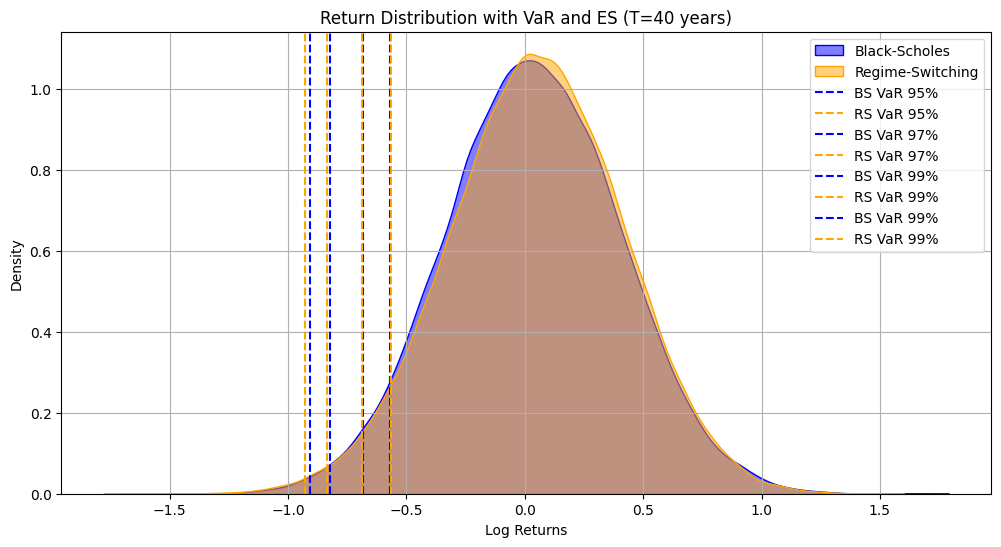

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# パラメータ設定（BSモデル）
epsilon_bs = 0  # 最低保証料率
S0 = 100  # 初期価格
n_steps_per_year = 12  # 月次データ
dt = 1 / n_steps_per_year  # 月次ステップ
n_simulations = 100000  # サンプルパスの数

# パラメータ設定（レジームスイッチングモデル）
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均（ドリフト）
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# ブラック-ショールズモデルのパラメータを計算（全期間で固定）
mu_bs = mu_monthly  # レジームの平均を全体平均として使用
sigma_bs = sigma_monthly  # レジームのボラティリティ平均を使用

# ブラック-ショールズモデルのサンプルパス生成関数
def simulate_bs_model(S0, mu, sigma, epsilon, n_steps, dt, n_simulations):
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        Z = np.random.normal(size=n_simulations)
        paths[:, t] = paths[:, t - 1] * np.exp((mu - epsilon - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# レジームスイッチングモデルのサンプルパス生成関数
def simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations):
    n_states = len(regime_means)
    paths = np.zeros((n_simulations, n_steps + 1))
    paths[:, 0] = S0
    for sim in range(n_simulations):
        current_state = 0  # 初期状態
        for t in range(1, n_steps + 1):
            Z = np.random.normal()
            mu = regime_means[current_state]
            sigma = regime_vols[current_state]
            paths[sim, t] = paths[sim, t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            # 次の状態を遷移確率行列に基づいて決定
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return paths

# VaRとESの計算関数
def calculate_var_es(returns, confidence_levels):
    var = {conf: np.percentile(returns, 100 * (1 - conf)) for conf in confidence_levels}
    es = {conf: returns[returns <= var[conf]].mean() for conf in confidence_levels}
    return var, es

# 検証用期間
T_list = [10, 20, 30, 40]
confidence_levels = [0.95, 0.975, 0.99, 0.995]

# 結果格納
results = {}

for T in T_list:
    n_steps = T * n_steps_per_year  # 総ステップ数

    # ブラック-ショールズモデルのシミュレーション
    bs_paths = simulate_bs_model(S0, mu_bs, sigma_bs, epsilon_bs, n_steps, dt, n_simulations)
    bs_final_prices = bs_paths[:, -1]
    bs_returns = np.log(bs_final_prices / S0)
    bs_var, bs_es = calculate_var_es(bs_returns, confidence_levels)

    # レジームスイッチングモデルのシミュレーション
    rs_paths = simulate_regime_switching_model(S0, trans_matrix, regime_means, regime_vols, n_steps, dt, n_simulations)
    rs_final_prices = rs_paths[:, -1]
    rs_returns = np.log(rs_final_prices / S0)
    rs_var, rs_es = calculate_var_es(rs_returns, confidence_levels)

    # 結果を保存
    results[T] = {
        "BS": {"VaR": bs_var, "ES": bs_es},
        "RS": {"VaR": rs_var, "ES": rs_es}
    }

    # 結果表示
    print(f"\n期間 T = {T} 年:")
    print("ブラック-ショールズモデル:")
    for conf in confidence_levels:
        print(f"  信頼水準 {int(conf * 100)}%: VaR = {bs_var[conf]:.5f}, ES = {bs_es[conf]:.5f}")
    print("レジームスイッチングモデル:")
    for conf in confidence_levels:
        print(f"  信頼水準 {int(conf * 100)}%: VaR = {rs_var[conf]:.5f}, ES = {rs_es[conf]:.5f}")

# 分布の可視化（最後の期間 T = 40年でプロット）
plt.figure(figsize=(12, 6))
sns.kdeplot(np.log(bs_paths[:, -1] / S0), label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(np.log(rs_paths[:, -1] / S0), label="Regime-Switching", fill=True, color="orange", alpha=0.5)
for conf in confidence_levels:
    plt.axvline(bs_var[conf], color='blue', linestyle='--', label=f"BS VaR {int(conf * 100)}%")
    plt.axvline(rs_var[conf], color='orange', linestyle='--', label=f"RS VaR {int(conf * 100)}%")
plt.title("Return Distribution with VaR and ES (T=40 years)")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


統計量（実データ）:
  平均: 0.00256, 標準偏差: 0.05801, 歪度: -0.55332, 尖度: 1.30017

統計量（ブラック-ショールズモデル）:
  平均: 0.00007, 標準偏差: 0.01676, 歪度: -0.00205, 尖度: 0.00326

統計量（レジームスイッチングモデル）:
  平均: 0.00008, 標準偏差: 0.01624, 歪度: -0.13842, 尖度: 0.83426


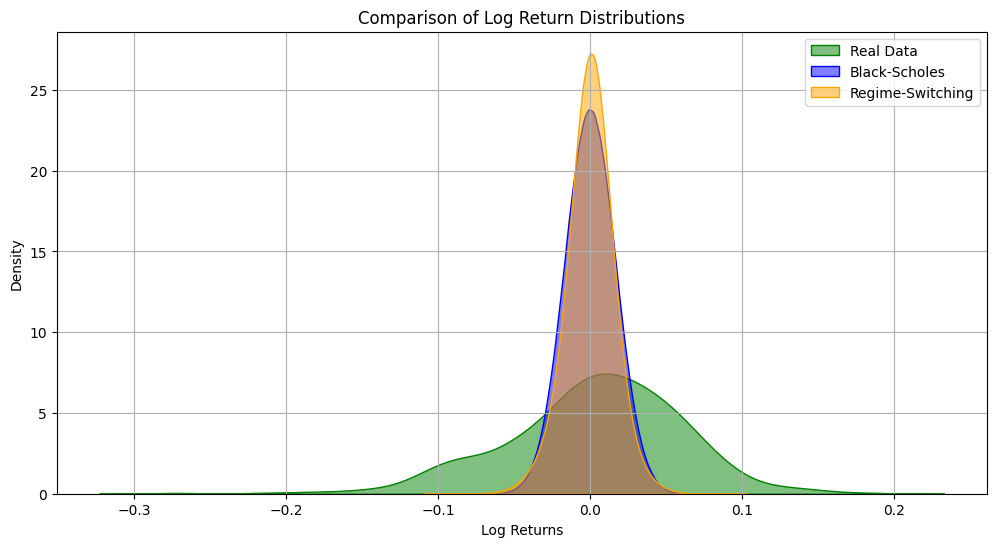

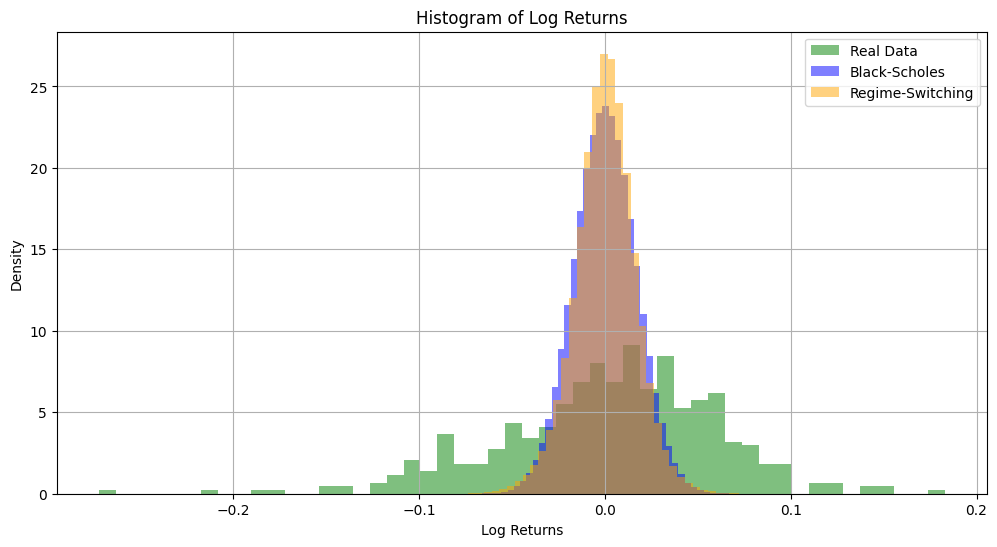

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 実データの対数収益率列を取得
real_log_returns = data['Log_Return'].dropna()

# モデルの対数収益率を計算
bs_log_returns = np.diff(np.log(bs_paths), axis=1).flatten()  # BSモデルの対数収益率
rs_log_returns = np.diff(np.log(rs_paths), axis=1).flatten()  # レジームスイッチングモデルの対数収益率

# ファットテール性を評価するための統計量計算
def calculate_tail_stats(data):
    mean = np.mean(data)
    std = np.std(data)
    skewness = pd.Series(data).skew()
    kurtosis = pd.Series(data).kurt()
    return mean, std, skewness, kurtosis

# 実データとモデルの統計量を計算
real_stats = calculate_tail_stats(real_log_returns)
bs_stats = calculate_tail_stats(bs_log_returns)
rs_stats = calculate_tail_stats(rs_log_returns)

# 統計量を表示
print("統計量（実データ）:")
print(f"  平均: {real_stats[0]:.5f}, 標準偏差: {real_stats[1]:.5f}, 歪度: {real_stats[2]:.5f}, 尖度: {real_stats[3]:.5f}")

print("\n統計量（ブラック-ショールズモデル）:")
print(f"  平均: {bs_stats[0]:.5f}, 標準偏差: {bs_stats[1]:.5f}, 歪度: {bs_stats[2]:.5f}, 尖度: {bs_stats[3]:.5f}")

print("\n統計量（レジームスイッチングモデル）:")
print(f"  平均: {rs_stats[0]:.5f}, 標準偏差: {rs_stats[1]:.5f}, 歪度: {rs_stats[2]:.5f}, 尖度: {rs_stats[3]:.5f}")

# 分布を比較するプロット（対数収益率）
plt.figure(figsize=(12, 6))
sns.kdeplot(real_log_returns, label="Real Data", fill=True, color="green", alpha=0.5)
sns.kdeplot(bs_log_returns, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_log_returns, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.title("Comparison of Log Return Distributions")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# ヒストグラムの比較（対数収益率）
plt.figure(figsize=(12, 6))
plt.hist(real_log_returns, bins=50, alpha=0.5, label="Real Data", density=True, color="green")
plt.hist(bs_log_returns, bins=50, alpha=0.5, label="Black-Scholes", density=True, color="blue")
plt.hist(rs_log_returns, bins=50, alpha=0.5, label="Regime-Switching", density=True, color="orange")
plt.title("Histogram of Log Returns")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


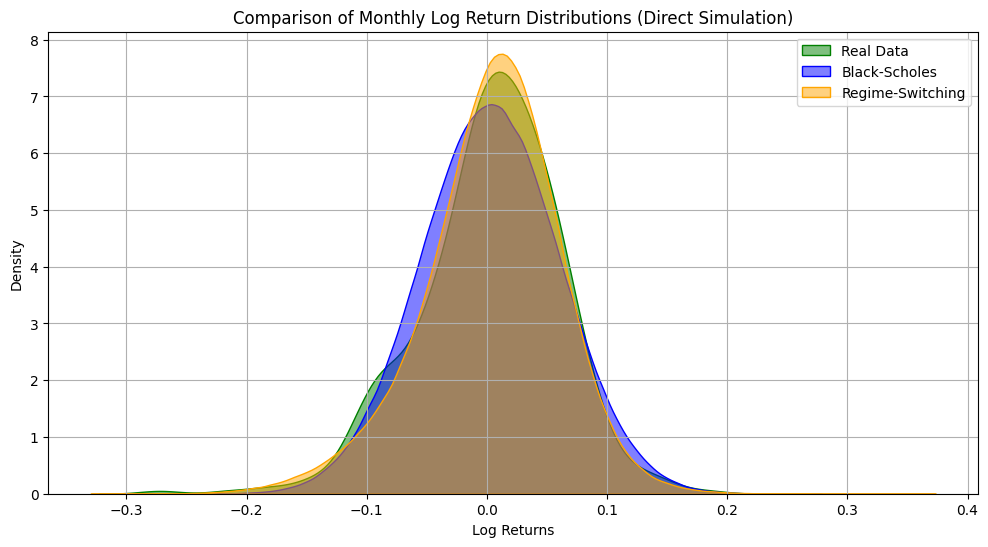

統計量（実データ）:
  平均: 0.00256, 標準偏差: 0.05801, 歪度: -0.55332, 尖度: 1.30017

統計量（ブラック-ショールズモデル）:
  平均: 0.00253, 標準偏差: 0.05804, 歪度: 0.00035, 尖度: -0.00119

統計量（レジームスイッチングモデル）:
  平均: 0.00330, 標準偏差: 0.05774, 歪度: -0.41259, 尖度: 0.80911


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 実データの月次対数収益率を取得
real_log_returns = data['Log_Return'].dropna()

# ブラック-ショールズモデルの収益率を直接生成
def simulate_bs_returns(mu, sigma, dt, n_steps, n_simulations):
    mean = mu
    std = sigma
    returns = np.random.normal(loc=mean, scale=std, size=(n_simulations, n_steps))
    return returns.flatten()

# レジームスイッチングモデルの収益率を直接生成
def simulate_rs_returns(trans_matrix, regime_means, regime_vols, dt, n_steps, n_simulations):
    returns = []
    for _ in range(n_simulations):
        current_state = 0
        for _ in range(n_steps):
            mean = regime_means[current_state]
            std = regime_vols[current_state]
            returns.append(np.random.normal(loc=mean, scale=std))
            current_state = np.random.choice(len(regime_means), p=trans_matrix[current_state])
    return np.array(returns)

# パラメータ設定
T = 10  # 期間（年）
dt = 1 / 12  # 月次ステップ
n_steps = int(T / dt)  # ステップ数
n_simulations = 10000  # シミュレーション回数


# レジームスイッチングモデルのパラメータ
trans_matrix = model.transmat_  # 遷移確率行列
regime_means = model.means_.flatten()  # レジームごとの月次平均
regime_vols = np.sqrt(model.covars_.flatten())  # レジームごとの月次ボラティリティ

# シミュレーション
bs_log_returns = simulate_bs_returns(mu_monthly, sigma_monthly, dt, n_steps, n_simulations)
rs_log_returns = simulate_rs_returns(trans_matrix, regime_means, regime_vols, dt, n_steps, n_simulations)

# 分布の比較
plt.figure(figsize=(12, 6))
sns.kdeplot(real_log_returns, label="Real Data", fill=True, color="green", alpha=0.5)
sns.kdeplot(bs_log_returns, label="Black-Scholes", fill=True, color="blue", alpha=0.5)
sns.kdeplot(rs_log_returns, label="Regime-Switching", fill=True, color="orange", alpha=0.5)
plt.title("Comparison of Monthly Log Return Distributions (Direct Simulation)")
plt.xlabel("Log Returns")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# 統計量の比較
def calculate_tail_stats(data):
    mean = np.mean(data)
    std = np.std(data)
    skewness = pd.Series(data).skew()
    kurtosis = pd.Series(data).kurt()
    return mean, std, skewness, kurtosis

real_stats = calculate_tail_stats(real_log_returns)
bs_stats = calculate_tail_stats(bs_log_returns)
rs_stats = calculate_tail_stats(rs_log_returns)

print("統計量（実データ）:")
print(f"  平均: {real_stats[0]:.5f}, 標準偏差: {real_stats[1]:.5f}, 歪度: {real_stats[2]:.5f}, 尖度: {real_stats[3]:.5f}")

print("\n統計量（ブラック-ショールズモデル）:")
print(f"  平均: {bs_stats[0]:.5f}, 標準偏差: {bs_stats[1]:.5f}, 歪度: {bs_stats[2]:.5f}, 尖度: {bs_stats[3]:.5f}")

print("\n統計量（レジームスイッチングモデル）:")
print(f"  平均: {rs_stats[0]:.5f}, 標準偏差: {rs_stats[1]:.5f}, 歪度: {rs_stats[2]:.5f}, 尖度: {rs_stats[3]:.5f}")


In [ ]:
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

# KS検定の実行
def perform_ks_test(real_data, model_data):
    stat, p_value = ks_2samp(real_data, model_data)
    return stat, p_value

# クラメール・フォン・ミーゼス検定の実行
def perform_cvm_test(real_data, model_data):
    # 実データの経験分布関数 (ECDF)
    ecdf_real = ECDF(real_data)
    ecdf_model = ECDF(model_data)

    # 累積分布関数の差の平方和
    data_points = np.sort(np.concatenate([real_data, model_data]))
    cdf_diff = ecdf_real(data_points) - ecdf_model(data_points)
    cvm_stat = np.sum(cdf_diff**2)

    return cvm_stat

# 統計的検定の実行
ks_stat_bs, ks_p_value_bs = perform_ks_test(real_log_returns, bs_log_returns)
ks_stat_rs, ks_p_value_rs = perform_ks_test(real_log_returns, rs_log_returns)

cvm_stat_bs = perform_cvm_test(real_log_returns, bs_log_returns)
cvm_stat_rs = perform_cvm_test(real_log_returns, rs_log_returns)

# 結果の表示
print("KS検定結果（ブラック-ショールズモデル）:")
print(f"  統計量: {ks_stat_bs:.5f}, p値: {ks_p_value_bs:.5f}")

print("KS検定結果（レジームスイッチングモデル）:")
print(f"  統計量: {ks_stat_rs:.5f}, p値: {ks_p_value_rs:.5f}")

print("\nクラメール・フォン・ミーゼス検定結果（ブラック-ショールズモデル）:")
print(f"  統計量: {cvm_stat_bs:.5f}")

print("クラメール・フォン・ミーゼス検定結果（レジームスイッチングモデル）:")
print(f"  統計量: {cvm_stat_rs:.5f}")


KS検定結果（ブラック-ショールズモデル）:
  統計量: 0.05970, p値: 0.06267
KS検定結果（レジームスイッチングモデル）:
  統計量: 0.02178, p値: 0.97305

クラメール・フォン・ミーゼス検定結果（ブラック-ショールズモデル）:
  統計量: 970.99145
クラメール・フォン・ミーゼス検定結果（レジームスイッチングモデル）:
  統計量: 73.32765


In [ ]:
from scipy.stats import anderson

# アンダーソン-ダーリング検定の実行
def perform_ad_test(data, dist="norm"):
    """
    Anderson-Darling検定を実行する関数
    :param data: 検定対象のデータ（1次元配列）
    :param dist: 検定する分布（"norm" = 正規分布, 他も指定可能）
    :return: 検定統計量, 臨界値, p値
    """
    result = anderson(data, dist=dist)
    return result.statistic, result.critical_values, result.significance_level

# 実データの検定
ad_stat_real, crit_values_real, signif_levels_real = perform_ad_test(real_log_returns)

# ブラック-ショールズモデルの検定
ad_stat_bs, crit_values_bs, signif_levels_bs = perform_ad_test(bs_log_returns)

# レジームスイッチングモデルの検定
ad_stat_rs, crit_values_rs, signif_levels_rs = perform_ad_test(rs_log_returns)

# 結果の表示
def display_ad_results(stat, crit_values, signif_levels, label):
    print(f"\n{label} のAnderson-Darling検定結果:")
    print(f"  検定統計量: {stat:.5f}")
    for cv, sl in zip(crit_values, signif_levels):
        print(f"  臨界値 (有意水準 {sl}%): {cv:.5f}")
    if stat < crit_values[2]:  # 通常は有意水準5%（臨界値の3番目）を基準
        print("  結論: 帰無仮説（分布に従う）を棄却できません。")
    else:
        print("  結論: 帰無仮説（分布に従う）を棄却します。")

# 検定結果の表示
display_ad_results(ad_stat_real, crit_values_real, signif_levels_real, "実データ")
display_ad_results(ad_stat_bs, crit_values_bs, signif_levels_bs, "ブラック-ショールズモデル")
display_ad_results(ad_stat_rs, crit_values_rs, signif_levels_rs, "レジームスイッチングモデル")



実データ のAnderson-Darling検定結果:
  検定統計量: 2.23852
  臨界値 (有意水準 15.0%): 0.57100
  臨界値 (有意水準 10.0%): 0.65100
  臨界値 (有意水準 5.0%): 0.78100
  臨界値 (有意水準 2.5%): 0.91100
  臨界値 (有意水準 1.0%): 1.08300
  結論: 帰無仮説（分布に従う）を棄却します。

ブラック-ショールズモデル のAnderson-Darling検定結果:
  検定統計量: 0.17795
  臨界値 (有意水準 15.0%): 0.57600
  臨界値 (有意水準 10.0%): 0.65600
  臨界値 (有意水準 5.0%): 0.78700
  臨界値 (有意水準 2.5%): 0.91800
  臨界値 (有意水準 1.0%): 1.09200
  結論: 帰無仮説（分布に従う）を棄却できません。

レジームスイッチングモデル のAnderson-Darling検定結果:
  検定統計量: 3552.91317
  臨界値 (有意水準 15.0%): 0.57600
  臨界値 (有意水準 10.0%): 0.65600
  臨界値 (有意水準 5.0%): 0.78700
  臨界値 (有意水準 2.5%): 0.91800
  臨界値 (有意水準 1.0%): 1.09200
  結論: 帰無仮説（分布に従う）を棄却します。


In [ ]:
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

# KS検定
def perform_ks_test(real_data, model_data):
    stat, p_value = ks_2samp(real_data, model_data)
    return stat, p_value

# クラメール・フォン・ミーゼス検定
def perform_cvm_test(real_data, model_data):
    ecdf_real = ECDF(real_data)
    ecdf_model = ECDF(model_data)
    data_points = np.sort(np.concatenate([real_data, model_data]))
    cdf_diff = ecdf_real(data_points) - ecdf_model(data_points)
    cvm_stat = np.sum(cdf_diff**2)
    return cvm_stat

# アンダーソン-ダーリング検定（分布への適合性を評価）
def perform_ad_test(real_data, model_data):
    # 累積分布関数の差を平方和で評価
    ecdf_real = ECDF(real_data)
    ecdf_model = ECDF(model_data)
    data_points = np.sort(np.concatenate([real_data, model_data]))
    cdf_diff = ecdf_real(data_points) - ecdf_model(data_points)
    ad_stat = np.sum(cdf_diff**2 / (ecdf_real(data_points) * (1 - ecdf_real(data_points))))
    return ad_stat

# 実データとモデルの分布を比較
ks_stat_bs, ks_p_value_bs = perform_ks_test(real_log_returns, bs_log_returns)
ks_stat_rs, ks_p_value_rs = perform_ks_test(real_log_returns, rs_log_returns)

cvm_stat_bs = perform_cvm_test(real_log_returns, bs_log_returns)
cvm_stat_rs = perform_cvm_test(real_log_returns, rs_log_returns)

ad_stat_bs = perform_ad_test(real_log_returns, bs_log_returns)
ad_stat_rs = perform_ad_test(real_log_returns, rs_log_returns)

# 結果の表示
print("KS検定結果（ブラック-ショールズモデル）:")
print(f"  統計量: {ks_stat_bs:.5f}, p値: {ks_p_value_bs:.5f}")
print("KS検定結果（レジームスイッチングモデル）:")
print(f"  統計量: {ks_stat_rs:.5f}, p値: {ks_p_value_rs:.5f}")

print("\nクラメール・フォン・ミーゼス検定結果（ブラック-ショールズモデル）:")
print(f"  統計量: {cvm_stat_bs:.5f}")
print("クラメール・フォン・ミーゼス検定結果（レジームスイッチングモデル）:")
print(f"  統計量: {cvm_stat_rs:.5f}")

print("\nアンダーソン-ダーリング検定結果（ブラック-ショールズモデル）:")
print(f"  統計量: {ad_stat_bs:.5f}")
print("アンダーソン-ダーリング検定結果（レジームスイッチングモデル）:")
print(f"  統計量: {ad_stat_rs:.5f}")


<ipython-input-52-cecabd9be0ce>:26: RuntimeWarning: divide by zero encountered in divide
  ad_stat = np.sum(cdf_diff**2 / (ecdf_real(data_points) * (1 - ecdf_real(data_points))))
<ipython-input-52-cecabd9be0ce>:26: RuntimeWarning: invalid value encountered in divide
  ad_stat = np.sum(cdf_diff**2 / (ecdf_real(data_points) * (1 - ecdf_real(data_points))))


KS検定結果（ブラック-ショールズモデル）:
  統計量: 0.05970, p値: 0.06267
KS検定結果（レジームスイッチングモデル）:
  統計量: 0.02178, p値: 0.97305

クラメール・フォン・ミーゼス検定結果（ブラック-ショールズモデル）:
  統計量: 970.99145
クラメール・フォン・ミーゼス検定結果（レジームスイッチングモデル）:
  統計量: 73.32765

アンダーソン-ダーリング検定結果（ブラック-ショールズモデル）:
  統計量: nan
アンダーソン-ダーリング検定結果（レジームスイッチングモデル）:
  統計量: nan


In [ ]:
def perform_ad_test_safe(real_data, model_data):
    ecdf_real = ECDF(real_data)
    ecdf_model = ECDF(model_data)
    data_points = np.sort(np.concatenate([real_data, model_data]))
    cdf_real = ecdf_real(data_points)
    cdf_diff = cdf_real - ecdf_model(data_points)
    epsilon = 1e-10  # ゼロ除算防止のための微小値
    ad_stat = np.sum(cdf_diff**2 / (cdf_real * (1 - cdf_real) + epsilon))
    return ad_stat


In [ ]:
# 実データとモデルデータの範囲を調整
common_min = min(real_log_returns.min(), bs_log_returns.min(), rs_log_returns.min())
common_max = max(real_log_returns.max(), bs_log_returns.max(), rs_log_returns.max())

real_log_returns = real_log_returns[(real_log_returns >= common_min) & (real_log_returns <= common_max)]
bs_log_returns = bs_log_returns[(bs_log_returns >= common_min) & (bs_log_returns <= common_max)]
rs_log_returns = rs_log_returns[(rs_log_returns >= common_min) & (rs_log_returns <= common_max)]


In [ ]:
# 修正版アンダーソン-ダーリング検定
ad_stat_bs = perform_ad_test_safe(real_log_returns, bs_log_returns)
ad_stat_rs = perform_ad_test_safe(real_log_returns, rs_log_returns)

# 結果の表示
print("\nアンダーソン-ダーリング検定結果（ブラック-ショールズモデル）:")
print(f"  統計量: {ad_stat_bs:.5f}")
print("アンダーソン-ダーリング検定結果（レジームスイッチングモデル）:")
print(f"  統計量: {ad_stat_rs:.5f}")



アンダーソン-ダーリング検定結果（ブラック-ショールズモデル）:
  統計量: 3280138.92588
アンダーソン-ダーリング検定結果（レジームスイッチングモデル）:
  統計量: 5380378.32289


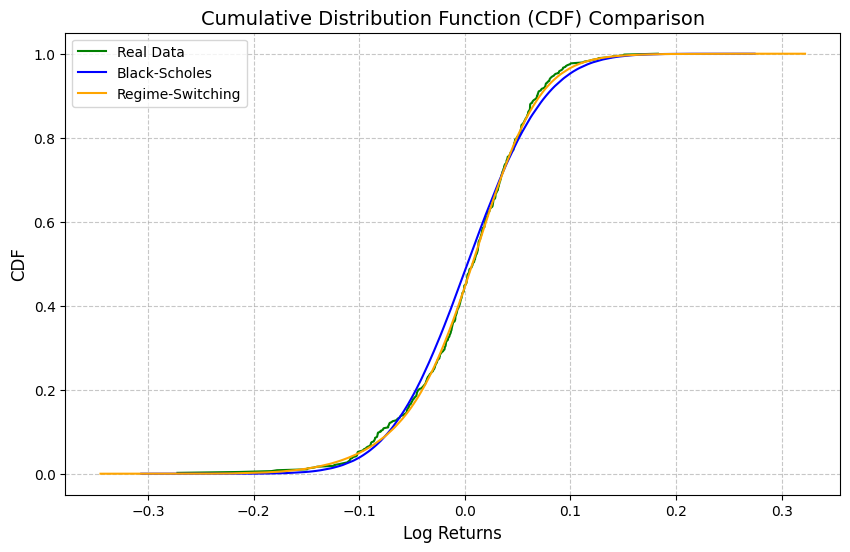

In [ ]:
# CDFプロット
plt.figure(figsize=(10, 6))

# 実データのCDF
ecdf_real = ECDF(real_log_returns)
plt.plot(ecdf_real.x, ecdf_real.y, label="Real Data", color="green")

# ブラック-ショールズモデルのCDF
ecdf_bs = ECDF(bs_log_returns)
plt.plot(ecdf_bs.x, ecdf_bs.y, label="Black-Scholes", color="blue")

# レジームスイッチングモデルのCDF
ecdf_rs = ECDF(rs_log_returns)
plt.plot(ecdf_rs.x, ecdf_rs.y, label="Regime-Switching", color="orange")

# プロット設定
plt.title("Cumulative Distribution Function (CDF) Comparison", fontsize=14)
plt.xlabel("Log Returns", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [ ]:
def calculate_var(data, alpha=0.05):
    """
    VaR (Value at Risk) を計算する関数
    :param data: データ配列
    :param alpha: 信頼水準（例: 0.05は95%信頼水準を意味する）
    :return: VaR値
    """
    return np.percentile(data, alpha * 100)

def calculate_es(data, alpha=0.05):
    """
    ES (Expected Shortfall) を計算する関数
    :param data: データ配列
    :param alpha: 信頼水準（例: 0.05は95%信頼水準を意味する）
    :return: ES値
    """
    var = calculate_var(data, alpha)
    return data[data <= var].mean()

# 信頼水準
alpha = 0.05  # 95%信頼水準

# 実データ
var_real = calculate_var(real_log_returns, alpha)
es_real = calculate_es(real_log_returns, alpha)

# ブラック-ショールズモデル
var_bs = calculate_var(bs_log_returns, alpha)
es_bs = calculate_es(bs_log_returns, alpha)

# レジームスイッチングモデル
var_rs = calculate_var(rs_log_returns, alpha)
es_rs = calculate_es(rs_log_returns, alpha)

# 結果の表示
print("Value at Risk (VaR) and Expected Shortfall (ES) 結果:")
print(f"実データ: VaR = {var_real:.5f}, ES = {es_real:.5f}")
print(f"ブラック-ショールズモデル: VaR = {var_bs:.5f}, ES = {es_bs:.5f}")
print(f"レジームスイッチングモデル: VaR = {var_rs:.5f}, ES = {es_rs:.5f}")


Value at Risk (VaR) and Expected Shortfall (ES) 結果:
実データ: VaR = -0.10128, ES = -0.13252
ブラック-ショールズモデル: VaR = -0.09289, ES = -0.11712
レジームスイッチングモデル: VaR = -0.09968, ES = -0.13382


In [ ]:
def calculate_var(data, alpha=0.025):
    """
    VaR (Value at Risk) を計算する関数
    :param data: データ配列
    :param alpha: 信頼水準（例: 0.05は95%信頼水準を意味する）
    :return: VaR値
    """
    return np.percentile(data, alpha * 100)

def calculate_es(data, alpha=0.025):
    """
    ES (Expected Shortfall) を計算する関数
    :param data: データ配列
    :param alpha: 信頼水準（例: 0.05は95%信頼水準を意味する）
    :return: ES値
    """
    var = calculate_var(data, alpha)
    return data[data <= var].mean()

# 信頼水準
alpha = 0.025  # 95%信頼水準

# 実データ
var_real = calculate_var(real_log_returns, alpha)
es_real = calculate_es(real_log_returns, alpha)

# ブラック-ショールズモデル
var_bs = calculate_var(bs_log_returns, alpha)
es_bs = calculate_es(bs_log_returns, alpha)

# レジームスイッチングモデル
var_rs = calculate_var(rs_log_returns, alpha)
es_rs = calculate_es(rs_log_returns, alpha)

# 結果の表示
print("Value at Risk (VaR) and Expected Shortfall (ES) 結果:")
print(f"実データ: VaR = {var_real:.5f}, ES = {es_real:.5f}")
print(f"ブラック-ショールズモデル: VaR = {var_bs:.5f}, ES = {es_bs:.5f}")
print(f"レジームスイッチングモデル: VaR = {var_rs:.5f}, ES = {es_rs:.5f}")


Value at Risk (VaR) and Expected Shortfall (ES) 結果:
実データ: VaR = -0.11136, ES = -0.15914
ブラック-ショールズモデル: VaR = -0.11124, ES = -0.13310
レジームスイッチングモデル: VaR = -0.12573, ES = -0.15662


In [ ]:
def calculate_var(data, alpha=0.01):
    """
    VaR (Value at Risk) を計算する関数
    :param data: データ配列
    :param alpha: 信頼水準（例: 0.05は95%信頼水準を意味する）
    :return: VaR値
    """
    return np.percentile(data, alpha * 100)

def calculate_es(data, alpha=0.01):
    """
    ES (Expected Shortfall) を計算する関数
    :param data: データ配列
    :param alpha: 信頼水準（例: 0.05は95%信頼水準を意味する）
    :return: ES値
    """
    var = calculate_var(data, alpha)
    return data[data <= var].mean()

# 信頼水準
alpha = 0.01  # 95%信頼水準

# 実データ
var_real = calculate_var(real_log_returns, alpha)
es_real = calculate_es(real_log_returns, alpha)

# ブラック-ショールズモデル
var_bs = calculate_var(bs_log_returns, alpha)
es_bs = calculate_es(bs_log_returns, alpha)

# レジームスイッチングモデル
var_rs = calculate_var(rs_log_returns, alpha)
es_rs = calculate_es(rs_log_returns, alpha)

# 結果の表示
print("Value at Risk (VaR) and Expected Shortfall (ES) 結果:")
print(f"実データ: VaR = {var_real:.5f}, ES = {es_real:.5f}")
print(f"ブラック-ショールズモデル: VaR = {var_bs:.5f}, ES = {es_bs:.5f}")
print(f"レジームスイッチングモデル: VaR = {var_rs:.5f}, ES = {es_rs:.5f}")


Value at Risk (VaR) and Expected Shortfall (ES) 結果:
実データ: VaR = -0.14931, ES = -0.19088
ブラック-ショールズモデル: VaR = -0.13242, ES = -0.15198
レジームスイッチングモデル: VaR = -0.15615, ES = -0.18301


In [ ]:
def calculate_var(data, alpha=0.005):
    """
    VaR (Value at Risk) を計算する関数
    :param data: データ配列
    :param alpha: 信頼水準（例: 0.05は95%信頼水準を意味する）
    :return: VaR値
    """
    return np.percentile(data, alpha * 100)

def calculate_es(data, alpha=0.005):
    """
    ES (Expected Shortfall) を計算する関数
    :param data: データ配列
    :param alpha: 信頼水準（例: 0.05は95%信頼水準を意味する）
    :return: ES値
    """
    var = calculate_var(data, alpha)
    return data[data <= var].mean()

# 信頼水準
alpha = 0.005  # 95%信頼水準

# 実データ
var_real = calculate_var(real_log_returns, alpha)
es_real = calculate_es(real_log_returns, alpha)

# ブラック-ショールズモデル
var_bs = calculate_var(bs_log_returns, alpha)
es_bs = calculate_es(bs_log_returns, alpha)

# レジームスイッチングモデル
var_rs = calculate_var(rs_log_returns, alpha)
es_rs = calculate_es(rs_log_returns, alpha)

# 結果の表示
print("Value at Risk (VaR) and Expected Shortfall (ES) 結果:")
print(f"実データ: VaR = {var_real:.5f}, ES = {es_real:.5f}")
print(f"ブラック-ショールズモデル: VaR = {var_bs:.5f}, ES = {es_bs:.5f}")
print(f"レジームスイッチングモデル: VaR = {var_rs:.5f}, ES = {es_rs:.5f}")


Value at Risk (VaR) and Expected Shortfall (ES) 結果:
実データ: VaR = -0.18105, ES = -0.22291
ブラック-ショールズモデル: VaR = -0.14679, ES = -0.16514
レジームスイッチングモデル: VaR = -0.17624, ES = -0.20088


In [ ]:
from scipy.stats import anderson_ksamp
from scipy.stats import PermutationMethod

# アンダーソン-ダーリング検定（method指定版）
def perform_ad_test_with_method(real_data, model_data):
    """
    アンダーソン-ダーリング検定をmethod指定で実行
    :param real_data: 実データ
    :param model_data: モデルデータ
    :return: 検定統計量, 臨界値, 有意水準
    """
    # PermutationMethodオブジェクトを作成
    permutation_method = PermutationMethod(n_resamples=1000, method='auto') # 必要に応じてn_resamplesを調整

    stat, critical_values, significance_level = anderson_ksamp(
        [real_data, model_data], method=permutation_method
    )
    return stat, critical_values, significance_level

In [ ]:
from scipy.stats import anderson_ksamp

# アンダーソン-ダーリング検定を行う関数
def perform_ad_test(real_data, model_data):
    """
    アンダーソン-ダーリング検定（k-sample）を実行
    :param real_data: 実データ（1次元配列）
    :param model_data: モデルデータ（1次元配列）
    :return: 検定統計量, p値
    """
    stat, critical_values, significance_level = anderson_ksamp([real_data, model_data])
    return stat, critical_values, significance_level

# 検定の実行（実データ vs ブラック-ショールズモデル）
ad_stat_bs, crit_bs, signif_bs = perform_ad_test(real_log_returns, bs_log_returns)

# 検定の実行（実データ vs レジームスイッチングモデル）
ad_stat_rs, crit_rs, signif_rs = perform_ad_test(real_log_returns, rs_log_returns)

# 検定結果の表示
print("アンダーソン-ダーリング検定結果（ブラック-ショールズモデル）:")
print(f"  統計量: {ad_stat_bs:.5f}")
print(f"  臨界値: {crit_bs}")
print(f"  有意水準: {signif_bs}")
if ad_stat_bs > crit_bs[-1]:
    print("  結論: 帰無仮説を棄却します（分布が異なる）。")
else:
    print("  結論: 帰無仮説を棄却できません（分布が同一）。")

print("\nアンダーソン-ダーリング検定結果（レジームスイッチングモデル）:")
print(f"  統計量: {ad_stat_rs:.5f}")
print(f"  臨界値: {crit_rs}")
print(f"  有意水準: {signif_rs}")
if ad_stat_rs > crit_rs[-1]:
    print("  結論: 帰無仮説を棄却します（分布が異なる）。")
else:
    print("  結論: 帰無仮説を棄却できません（分布が同一）。")


アンダーソン-ダーリング検定結果（ブラック-ショールズモデル）:
  統計量: 1.63228
  臨界値: [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  有意水準: 0.06890748585760659
  結論: 帰無仮説を棄却できません（分布が同一）。

アンダーソン-ダーリング検定結果（レジームスイッチングモデル）:
  統計量: -0.94615
  臨界値: [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
  有意水準: 0.25
  結論: 帰無仮説を棄却できません（分布が同一）。


<ipython-input-51-f85fb39361b0>:11: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  stat, critical_values, significance_level = anderson_ksamp([real_data, model_data])


In [ ]:
from scipy.stats import entropy

# KL Divergenceを計算する関数
def calculate_kl_divergence(real_data, model_data, bins=50):
    """
    実データとモデルデータ間のKL Divergenceを計算
    :param real_data: 実データ
    :param model_data: モデルデータ
    :param bins: ヒストグラムのビン数
    :return: KL Divergence
    """
    # 実データとモデルデータのヒストグラムを計算
    p_hist, bin_edges = np.histogram(real_data, bins=bins, density=True)
    q_hist, _ = np.histogram(model_data, bins=bin_edges, density=True)

    # ゼロを避けるために微小値を追加
    epsilon = 1e-10
    p_hist = p_hist + epsilon
    q_hist = q_hist + epsilon

    # KL Divergenceの計算
    kl_div = entropy(p_hist, q_hist)
    return kl_div

# KL Divergenceの計算（ブラック-ショールズモデル）
kl_div_bs = calculate_kl_divergence(real_log_returns, bs_log_returns)

# KL Divergenceの計算（レジームスイッチングモデル）
kl_div_rs = calculate_kl_divergence(real_log_returns, rs_log_returns)

# 結果の表示
print(f"KL Divergence（ブラック-ショールズモデル）: {kl_div_bs:.5f}")
print(f"KL Divergence（レジームスイッチングモデル）: {kl_div_rs:.5f}")


KL Divergence（ブラック-ショールズモデル）: 3.88786
KL Divergence（レジームスイッチングモデル）: 0.06314


区間を変えたときの計算

リスク中立測度に変換して最低保証料率を計算する，